<center><h1>QBUS3600 - SID: 500695465 </h1></center>

## Data loading

This section is to import external libraries and read data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm          
from scipy import stats
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [2]:
# Import training and test data
data = pd.read_csv('QBUS_LOreal_Data_Classification.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 70 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Unnamed: 0                                6400 non-null   int64  
 1   CustomerID                                6400 non-null   object 
 2   Has_Transaction_Nov23_May24               6400 non-null   int64  
 3   Total_Spent_Nov23_May24                   6400 non-null   float64
 4   Total_Spent_1M                            6400 non-null   float64
 5   Transaction_Count_1M                      6400 non-null   int64  
 6   Total_Spent_3M                            6400 non-null   float64
 7   Transaction_Count_3M                      6400 non-null   int64  
 8   Total_Spent_6M                            6400 non-null   float64
 9   Transaction_Count_6M                      6400 non-null   int64  
 10  Total_Spent_9M                      

## Data cleaning
This section is to discuss some data quality checking and appropriate data cleaning

In [3]:
data.head()

Unnamed: 0 CustomerID  Has_Transaction_Nov23_May24  \
0           0   LRP00002                            1   
1           1   LRP00004                            1   
2           2   LRP00008                            1   
3           3   LRP00009                            1   
4           4   LRP00012                            1   

   Total_Spent_Nov23_May24  Total_Spent_1M  Transaction_Count_1M  \
0                   119.81          143.00                     1   
1                   461.54            0.00                     0   
2                    38.41            0.00                     0   
3                   168.25           73.62                     1   
4                    82.28            0.00                     0   

   Total_Spent_3M  Transaction_Count_3M  Total_Spent_6M  Transaction_Count_6M  \
0          143.00                     1          143.00                     1   
1            0.00                     0          189.36                     1   
2            0.00                     0          161.59                     1   
3           73.62                     1           73.62                     1   
4            0.00                     0            0.00                     0   

   Total_Spent_9M  Transaction_Count_9M  Total_Spent_12M  \
0          143.00                     1           143.00   
1          189.36                     1           189.36   
2          161.59                     1           161.59   
3           73.62                     1            73.62   
4            0.00                     0             0.00   

   Transaction_Count_12M  Total_Spent_AllTime  Transaction_Count_AllTime  \
0                      1               143.00                          1   
1                      1               189.36                          1   
2                      1               161.59                          1   
3                      1                73.62                          1   
4                      0                88.85                          1   

   Brand Description_Anthelios  Brand Description_Bundle  \
0                            1                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            2                         0   

   Brand Description_Cicaplast  Brand Description_Eau Thermale  \
0                            0                               0   
1                            0                               0   
2                            1                               0   
3                            0                               0   
4                            0                               0   

   Brand Description_Effaclar  Brand Description_Hyalu B5  \
0                           1                           0   
1                           4                           0   
2                           3                           0   
3                           0                           0   
4                           0                           0   

   Brand Description_Lipikar  Brand Description_Niacinamide  \
0                          0                              0   
1                          0                              1   
2                          0                              0   
3                          2                              0   
4                          0                              0   

   Brand Description_Retinol LRP  Brand Description_Serozinc  \
0                              0                           0   
1                              0                           1   
2                              0                           0   
3                              0                           0   
4                              0                           0   

   Brand Description_Toleriane  Brand Description_Uvidea 

In [4]:
# Remove rows with missing values
data.dropna(subset=['CustomerID'], inplace=True)
# Remove duplicate rows
data.drop_duplicates(inplace=True)
data.shape

(6400, 70)

Since there are duplicate columns 'Category_Face Care', we combine them and drop the old ones.

In [5]:
# Combine the 36th and 37th columns into 'Category_Face_Care'
data['Category_Face_Care'] = data.iloc[:, 35] + data.iloc[:, 36]

# Drop the 36th and 37th columns
data.drop(data.columns[[35, 36]], axis=1, inplace=True)

# Display the updated DataFrame
data.head()


Unnamed: 0 CustomerID  Has_Transaction_Nov23_May24  \
0           0   LRP00002                            1   
1           1   LRP00004                            1   
2           2   LRP00008                            1   
3           3   LRP00009                            1   
4           4   LRP00012                            1   

   Total_Spent_Nov23_May24  Total_Spent_1M  Transaction_Count_1M  \
0                   119.81          143.00                     1   
1                   461.54            0.00                     0   
2                    38.41            0.00                     0   
3                   168.25           73.62                     1   
4                    82.28            0.00                     0   

   Total_Spent_3M  Transaction_Count_3M  Total_Spent_6M  Transaction_Count_6M  \
0          143.00                     1          143.00                     1   
1            0.00                     0          189.36                     1   
2            0.00                     0          161.59                     1   
3           73.62                     1           73.62                     1   
4            0.00                     0            0.00                     0   

   Total_Spent_9M  Transaction_Count_9M  Total_Spent_12M  \
0          143.00                     1           143.00   
1          189.36                     1           189.36   
2          161.59                     1           161.59   
3           73.62                     1            73.62   
4            0.00                     0             0.00   

   Transaction_Count_12M  Total_Spent_AllTime  Transaction_Count_AllTime  \
0                      1               143.00                          1   
1                      1               189.36                          1   
2                      1               161.59                          1   
3                      1                73.62                          1   
4                      0                88.85                          1   

   Brand Description_Anthelios  Brand Description_Bundle  \
0                            1                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            2                         0   

   Brand Description_Cicaplast  Brand Description_Eau Thermale  \
0                            0                               0   
1                            0                               0   
2                            1                               0   
3                            0                               0   
4                            0                               0   

   Brand Description_Effaclar  Brand Description_Hyalu B5  \
0                           1                           0   
1                           4                           0   
2                           3                           0   
3                           0                           0   
4                           0                           0   

   Brand Description_Lipikar  Brand Description_Niacinamide  \
0                          0                              0   
1                          0                              1   
2                          0                              0   
3                          2                              0   
4                          0                              0   

   Brand Description_Retinol LRP  Brand Description_Serozinc  \
0                              0                           0   
1                              0                           1   
2                              0                           0   
3                              0                           0   
4                              0                           0   

   Brand Description_Toleriane  Brand Description_Uvidea 

In [6]:
data.shape

(6400, 69)

### Data type treatment
We examine the data type and see if there is any anamolies

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6400 entries, 0 to 6399
Data columns (total 69 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Unnamed: 0                                6400 non-null   int64  
 1   CustomerID                                6400 non-null   object 
 2   Has_Transaction_Nov23_May24               6400 non-null   int64  
 3   Total_Spent_Nov23_May24                   6400 non-null   float64
 4   Total_Spent_1M                            6400 non-null   float64
 5   Transaction_Count_1M                      6400 non-null   int64  
 6   Total_Spent_3M                            6400 non-null   float64
 7   Transaction_Count_3M                      6400 non-null   int64  
 8   Total_Spent_6M                            6400 non-null   float64
 9   Transaction_Count_6M                      6400 non-null   int64  
 10  Total_Spent_9M                      

Seems like there are many missing values in postcode. We won't be using this column as we are not interested in understanding relationships between post codes and total purchases in the report

## EDA and data transformation
- This section is to perform EDA to understand better the relationship between variables and statistical properties of all variables. 
- Discuss some potential data transformation that will be potentially used to improve models'performance later. This section is to justify the motivation of applying any paricular data transformation later (if any).

### Understanding the dataset

In [8]:
# Generating descriptive statistics for the entire dataset
descriptive_stats = data.describe()

descriptive_stats

Unnamed: 0  Has_Transaction_Nov23_May24  Total_Spent_Nov23_May24  \
count  6400.00000                       6400.0              6400.000000   
mean   3418.94750                          1.0               162.998742   
std    1967.04255                          0.0               127.477466   
min       0.00000                          1.0                25.510000   
25%    1709.75000                          1.0                79.950000   
50%    3432.50000                          1.0               124.355000   
75%    5121.25000                          1.0               200.825000   
max    6813.00000                          1.0              1379.580000   

       Total_Spent_1M  Transaction_Count_1M  Total_Spent_3M  \
count     6400.000000           6400.000000     6400.000000   
mean        34.455266              0.292812       62.449945   
std         69.569793              0.518040       94.729159   
min          0.000000              0.000000        0.000000   
25%          0.000000              0.000000        0.000000   
50%          0.000000              0.000000        0.000000   
75%         53.960000              1.000000      107.850000   
max        872.740000              6.000000      960.930000   

       Transaction_Count_3M  Total_Spent_6M  Transaction_Count_6M  \
count           6400.000000     6400.000000           6400.000000   
mean               0.541562      114.505731              1.002969   
std                0.724943      135.895771              1.040134   
min                0.000000        0.000000              0.000000   
25%                0.000000        0.000000              0.000000   
50%                0.000000       84.720000              1.000000   
75%                1.000000      161.850000              1.000000   
max                9.000000     1875.750000             20.000000   

       Total_Spent_9M  Transaction_Count_9M  Total_Spent_12M  \
count     6400.000000           6400.000000      6400.000000   
mean       155.998252              1.377031       185.010925   
std        166.667910              1.256906       187.458998   
min          0.000000              0.000000         0.000000   
25%         57.520000              1.000000        71.900000   
50%        115.100000              1.000000       135.465000   
75%        208.820000              2.000000       239.810000   
max       2698.770000             28.000000      3232.630000   

       Transaction_Count_12M  Total_Spent_AllTime  Transaction_Count_AllTime  \
count            6400.000000          6400.000000                6400.000000   
mean                1.639844           230.895473                   2.075156   
std                 1.402944           224.224104                   1.677874   
min                 0.000000             9.950000                   1.000000   
25%                 1.000000            91.895000                   1.000000   
50%                 1.000000           157.585000                   1.000000   
75%                 2.000000           284.495000                   3.000000   
max                31.000000          3410.430000                  31.000000   

       Brand Description_Anthelios  Brand Description_Bundle  \
count                  6400.000000               6400.000000   
mean                      0.580000                  0.040781   
std                       1.007476                  0.237307   
min                       0.000000                  0.000000   
25%                       0.000000                  0.000000   
50%                       0.000000                  0.000000   
75%                       1.000000                  0.000000   
max                      13.000000                  5.000000   

       Brand Description_Cicaplast  Brand Description_Eau Thermale  \
count                  6400.000000                     6400.000000   
mean                      0.338281                        0.034063   
std                       0.850124                      

In [9]:

# Selecting only the specified columns for descriptive statistics
columns_of_interest = [
    'Total_Spent_Nov23_May24', 'Total_Spent_1M', 'Total_Spent_3M', 
    'Total_Spent_6M', 'Total_Spent_9M', 'Total_Spent_12M', 'Total_Spent_AllTime'
]

# Calculate descriptive statistics for the specified columns
descriptive_stats = data[columns_of_interest].describe().T  # Transpose for better readability

# Add skewness and kurtosis to the statistics
descriptive_stats['skewness'] = data[columns_of_interest].skew()
descriptive_stats['kurtosis'] = data[columns_of_interest].kurtosis()

# Display the updated descriptive statistics
descriptive_stats

count        mean         std    min     25%  \
Total_Spent_Nov23_May24  6400.0  162.998742  127.477466  25.51  79.950   
Total_Spent_1M           6400.0   34.455266   69.569793   0.00   0.000   
Total_Spent_3M           6400.0   62.449945   94.729159   0.00   0.000   
Total_Spent_6M           6400.0  114.505731  135.895771   0.00   0.000   
Total_Spent_9M           6400.0  155.998252  166.667910   0.00  57.520   
Total_Spent_12M          6400.0  185.010925  187.458998   0.00  71.900   
Total_Spent_AllTime      6400.0  230.895473  224.224104   9.95  91.895   

                             50%      75%      max  skewness   kurtosis  
Total_Spent_Nov23_May24  124.355  200.825  1379.58  2.867704  13.302603  
Total_Spent_1M             0.000   53.960   872.74  2.791204  12.300396  
Total_Spent_3M             0.000  107.850   960.93  2.355380   9.329963  
Total_Spent_6M            84.720  161.850  1875.75  2.675881  15.090280  
Total_Spent_9M           115.100  208.820  2698.77  3.181643  23.494338  
Total_Spent_12M          135.465  239.810  3232.63  3.449220  28.473276  
Total_Spent_AllTime      157.585  284.495  3410.43  3.619972  26.866310

From our observations, the majority of the data is skewed. Let's look at the historgram of relevant variables

### 1M vs 3M vs 6M vs Total spending

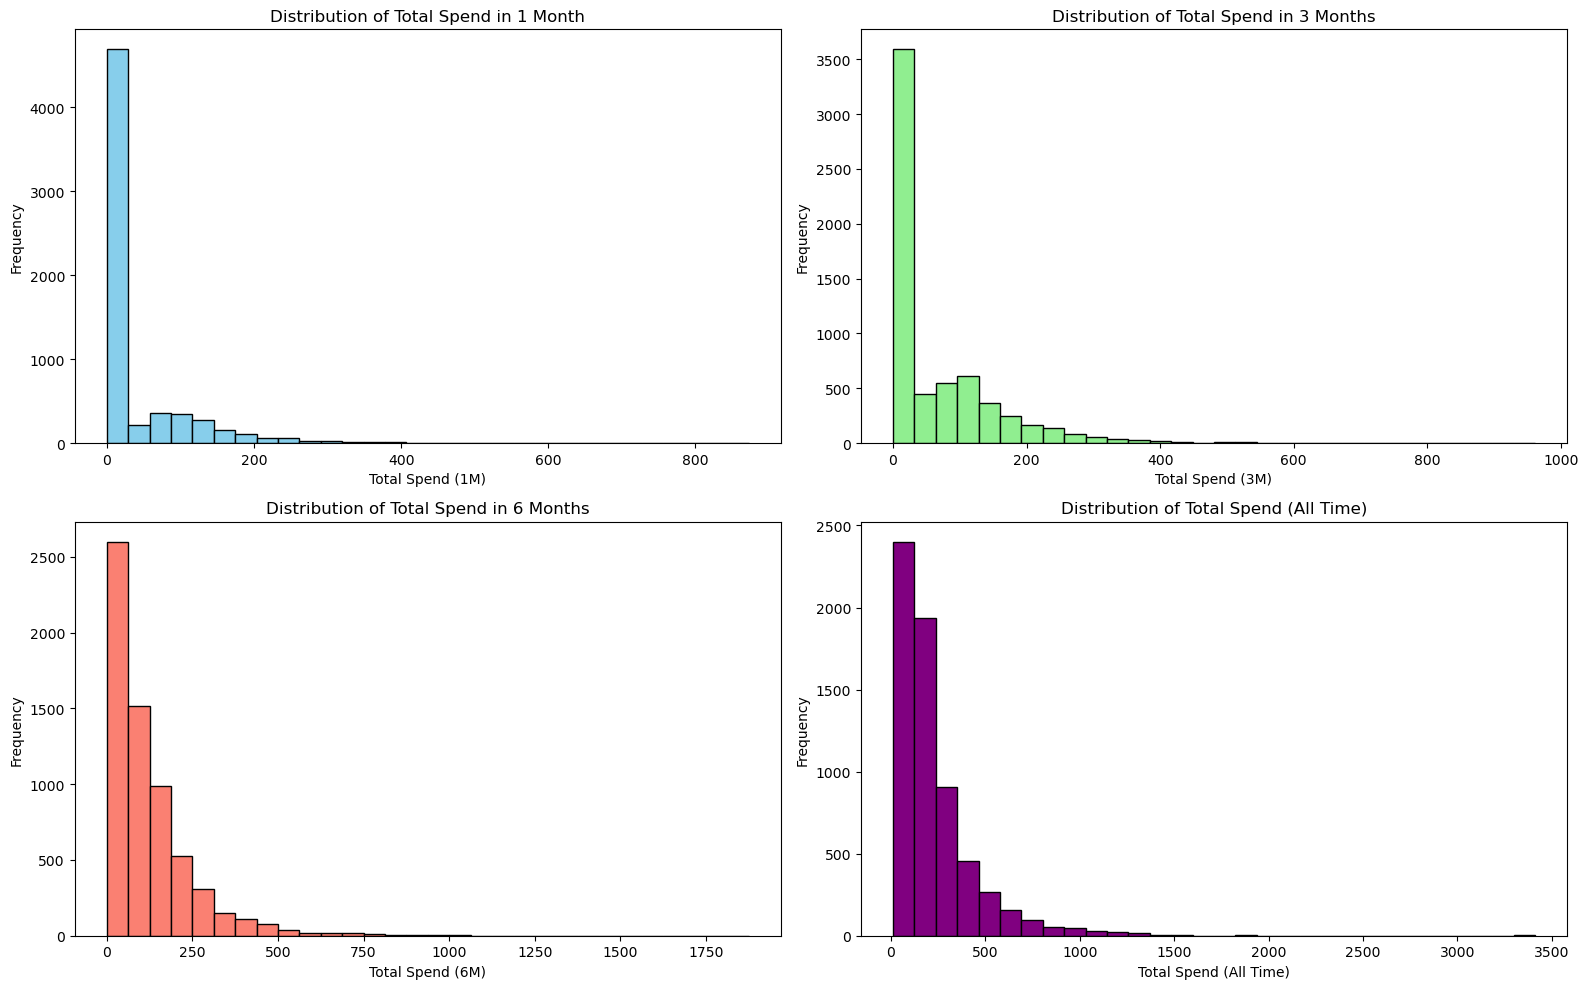

In [10]:
import matplotlib.pyplot as plt

# Plotting distributions of total spend across different time periods
plt.figure(figsize=(16, 10))

# 1 Month Spend
plt.subplot(2, 2, 1)
plt.hist(data['Total_Spent_1M'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Spend in 1 Month')
plt.xlabel('Total Spend (1M)')
plt.ylabel('Frequency')

# 3 Months Spend
plt.subplot(2, 2, 2)
plt.hist(data['Total_Spent_3M'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of Total Spend in 3 Months')
plt.xlabel('Total Spend (3M)')
plt.ylabel('Frequency')

# 6 Months Spend
plt.subplot(2, 2, 3)
plt.hist(data['Total_Spent_6M'], bins=30, color='salmon', edgecolor='black')
plt.title('Distribution of Total Spend in 6 Months')
plt.xlabel('Total Spend (6M)')
plt.ylabel('Frequency')

# All Time Spend
plt.subplot(2, 2, 4)
plt.hist(data['Total_Spent_AllTime'], bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Total Spend (All Time)')
plt.xlabel('Total Spend (All Time)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Let's zoom in to look at the distributions

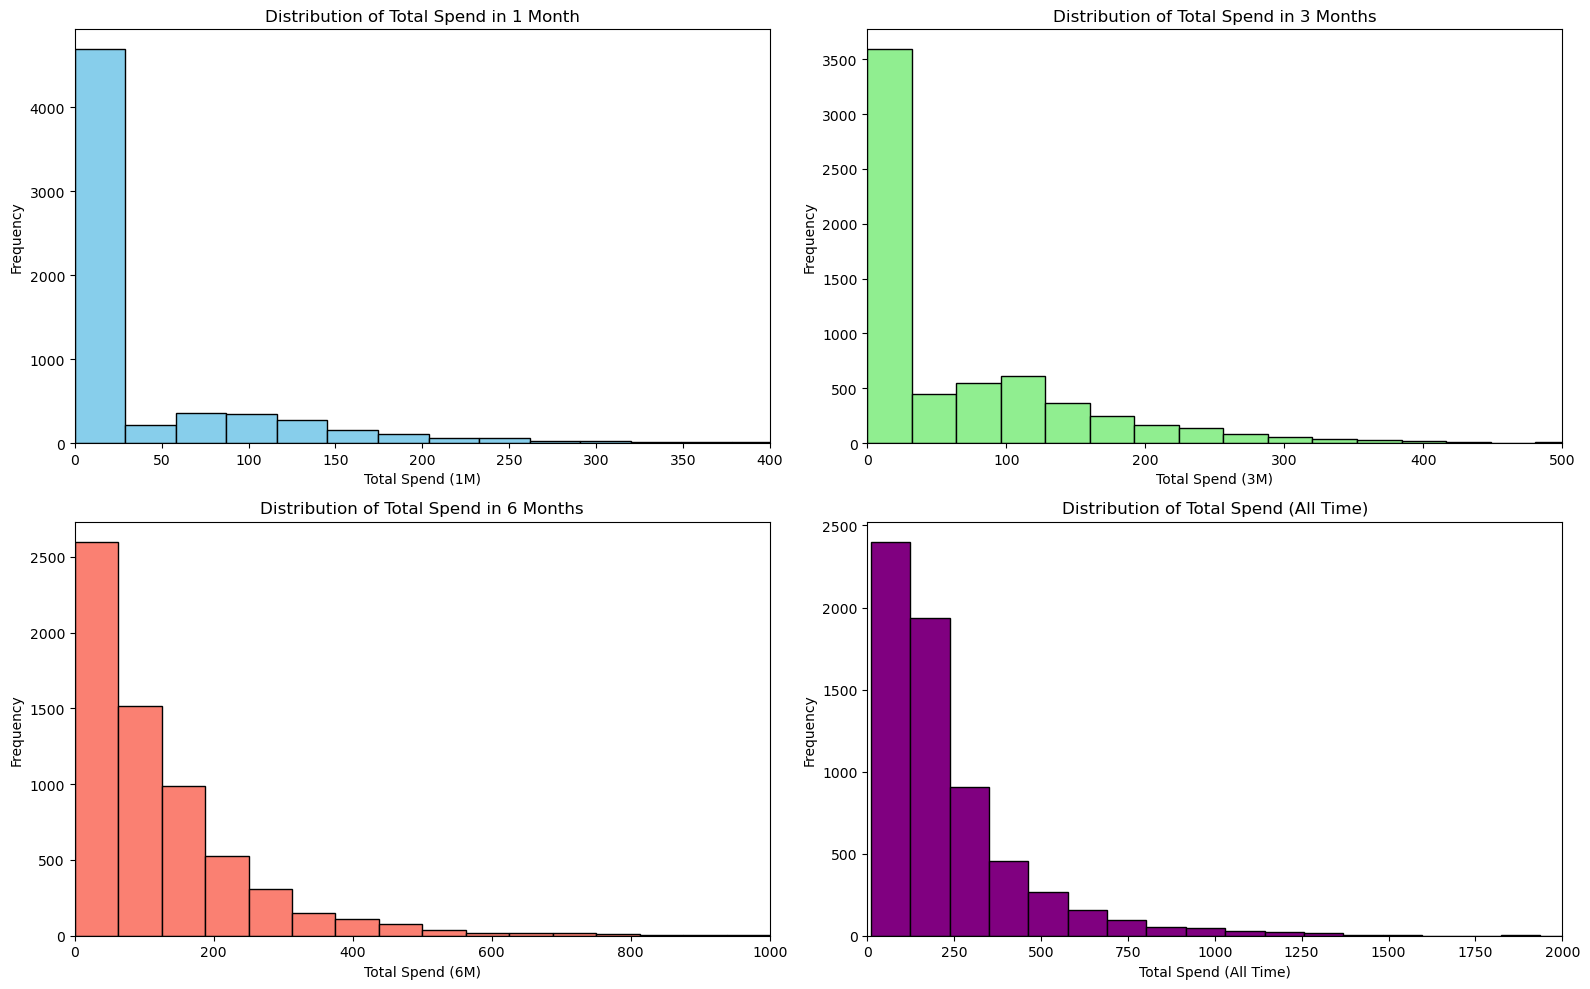

In [11]:
import matplotlib.pyplot as plt

# Plotting distributions of total spend across different time periods
plt.figure(figsize=(16, 10))

# 1 Month Spend
plt.subplot(2, 2, 1)
plt.hist(data['Total_Spent_1M'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Spend in 1 Month')
plt.xlabel('Total Spend (1M)')
plt.ylabel('Frequency')
plt.xlim(0, 400)

# 3 Months Spend
plt.subplot(2, 2, 2)
plt.hist(data['Total_Spent_3M'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of Total Spend in 3 Months')
plt.xlabel('Total Spend (3M)')
plt.ylabel('Frequency')
plt.xlim(0, 500)

# 6 Months Spend
plt.subplot(2, 2, 3)
plt.hist(data['Total_Spent_6M'], bins=30, color='salmon', edgecolor='black')
plt.title('Distribution of Total Spend in 6 Months')
plt.xlabel('Total Spend (6M)')
plt.ylabel('Frequency')
plt.xlim(0, 1000)

# All Time Spend
plt.subplot(2, 2, 4)
plt.hist(data['Total_Spent_AllTime'], bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Total Spend (All Time)')
plt.xlabel('Total Spend (All Time)')
plt.ylabel('Frequency')
plt.xlim(0, 2000)

plt.tight_layout()
plt.show()


In [12]:
# Calculate skewness and kurtosis for the relevant columns
skewness = data[['Total_Spent_1M', 'Total_Spent_3M', 'Total_Spent_6M', 'Total_Spent_Nov23_May24']].skew()
kurtosis = data[['Total_Spent_1M', 'Total_Spent_3M', 'Total_Spent_6M', 'Total_Spent_Nov23_May24']].kurtosis()

# Combine skewness and kurtosis into one DataFrame for easier comparison
stats = pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurtosis})

# Display the stats to the user

stats


Skewness   Kurtosis
Total_Spent_1M           2.791204  12.300396
Total_Spent_3M           2.355380   9.329963
Total_Spent_6M           2.675881  15.090280
Total_Spent_Nov23_May24  2.867704  13.302603

##### Interpretation:
- Skewness: All the columns show positive skewness (greater than 2), indicating that the data is highly right-skewed. Most customers have low spending, but a few have much higher spending.

- Kurtosis: The kurtosis values are quite high (greater than 3), indicating that the data distributions have heavy tails. This suggests the presence of extreme values (outliers) in customer spending.

# Low, medium and high spenders
Let's look at the distribution between low, medium and high spenders

In [13]:
# Adjusting the code to put histograms side by side instead of stacked

# Ensure 'Total_Spent_AllTime' exists, otherwise handle gracefully
if 'Total_Spent_AllTime' in data.columns and 'Spender_Category' in data.columns:
    # Create histograms for each spender category side by side
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Low Spender Histogram
    axes[0].hist(data[data['Spender_Category'] == 'Low Spender']['Total_Spent_AllTime'], bins=20, color='blue', edgecolor='black')
    axes[0].set_title('Low Spender Distribution')
    axes[0].set_xlabel('Total Spent (All Time)')
    axes[0].set_ylabel('Frequency')

    # Medium Spender Histogram
    axes[1].hist(data[data['Spender_Category'] == 'Medium Spender']['Total_Spent_AllTime'], bins=20, color='green', edgecolor='black')
    axes[1].set_title('Medium Spender Distribution')
    axes[1].set_xlabel('Total Spent (All Time)')
    axes[1].set_ylabel('Frequency')

    # High Spender Histogram
    axes[2].hist(data[data['Spender_Category'] == 'High Spender']['Total_Spent_AllTime'], bins=20, color='red', edgecolor='black')
    axes[2].set_title('High Spender Distribution')
    axes[2].set_xlabel('Total Spent (All Time)')
    axes[2].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()


### Observations:

- Low spenders have a broad spending range but tend to peak around 50–60.
- Medium spenders are more concentrated with a peak around 140, suggesting more uniform behavior.
- High spenders are skewed, with a majority spending around 500 , but a few making much larger purchases, creating a long tail in the distribution.

## Log transformation effectiveness

We'll try to log transform and compare to see if log transformation improves the normal distribution.

In [14]:
# Filtering out zero or negative values before applying np.log to avoid runtime warnings
data['log_Total_Spent_Nov23_May24'] = np.where(data['Total_Spent_Nov23_May24'] > 0, np.log(data['Total_Spent_Nov23_May24']), np.nan)
data['log_Total_Spent_1M'] = np.where(data['Total_Spent_1M'] > 0, np.log(data['Total_Spent_1M']), np.nan)
data['log_Total_Spent_3M'] = np.where(data['Total_Spent_3M'] > 0, np.log(data['Total_Spent_3M']), np.nan)
data['log_Total_Spent_6M'] = np.where(data['Total_Spent_6M'] > 0, np.log(data['Total_Spent_6M']), np.nan)
data['log_Total_Spent_AllTime'] = np.where(data['Total_Spent_AllTime'] > 0, np.log(data['Total_Spent_AllTime']), np.nan)

# Checking if the transformation was applied successfully without warnings
data[['log_Total_Spent_Nov23_May24', 'log_Total_Spent_1M', 'log_Total_Spent_3M', 'log_Total_Spent_6M', 'log_Total_Spent_AllTime']].head()


/Users/macbook/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/macbook/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/macbook/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


log_Total_Spent_Nov23_May24  log_Total_Spent_1M  log_Total_Spent_3M  \
0                     4.785907            4.962845            4.962845   
1                     6.134569                 NaN                 NaN   
2                     3.648318                 NaN                 NaN   
3                     5.125451            4.298917            4.298917   
4                     4.410128                 NaN                 NaN   

   log_Total_Spent_6M  log_Total_Spent_AllTime  
0            4.962845                 4.962845  
1            5.243650                 5.243650  
2            5.085062                 5.085062  
3            4.298917                 4.298917  
4                 NaN                 4.486950

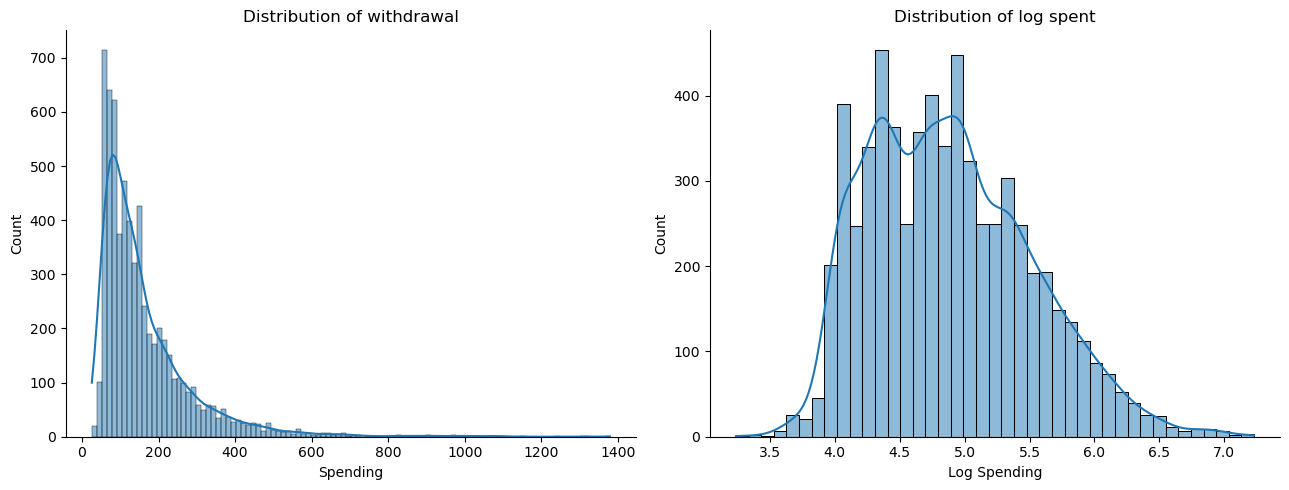

In [15]:
fig, ax = plt.subplots(1,2,figsize=(13,5))

# Plot histogram of earnings
sns.histplot(x=data['Total_Spent_Nov23_May24'], ax=ax[0], kde=True)
ax[0].set_title('Distribution of withdrawal', fontsize=12)
ax[0].set_xlabel('Spending')

# Plot histogram of log earnings
sns.histplot(x=data['log_Total_Spent_Nov23_May24'], ax=ax[1], kde=True)
ax[1].set_title('Distribution of log spent', fontsize=12)
ax[1].set_xlabel('Log Spending')

# Layout set up
sns.despine()
plt.tight_layout()
plt.show()

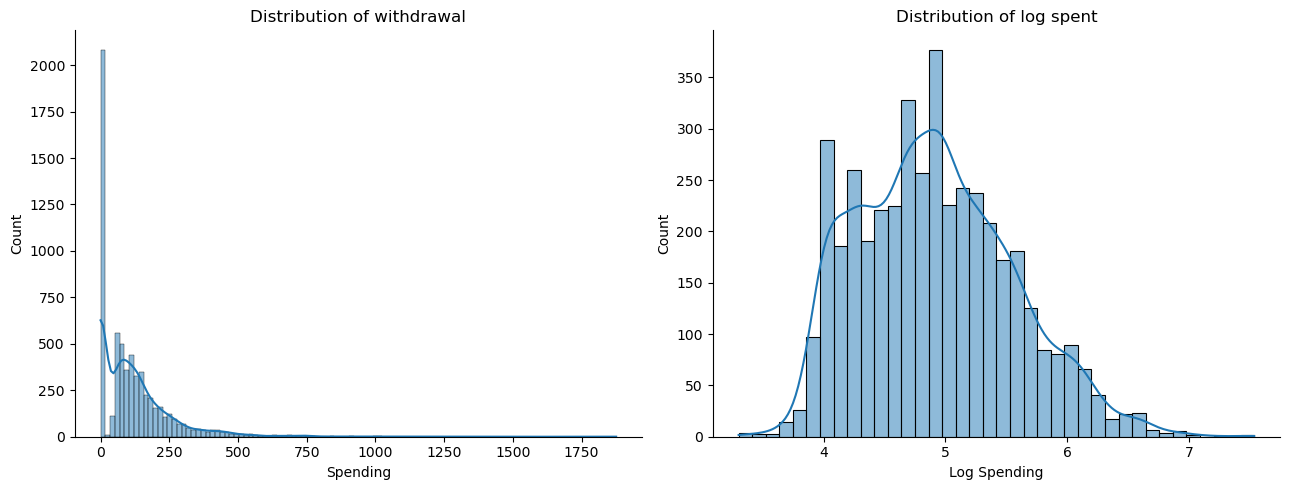

In [16]:

fig, ax = plt.subplots(1,2,figsize=(13,5))

# Plot histogram of earnings
sns.histplot(x=data['Total_Spent_6M'], ax=ax[0], kde=True)
ax[0].set_title('Distribution of withdrawal', fontsize=12)
ax[0].set_xlabel('Spending')

# Plot histogram of log earnings
sns.histplot(x=data['log_Total_Spent_6M'], ax=ax[1], kde=True)
ax[1].set_title('Distribution of log spent', fontsize=12)
ax[1].set_xlabel('Log Spending')

# Layout set up
sns.despine()
plt.tight_layout()
plt.show()

#### Effect of Log Transformation on Spending Distribution
Initially, the distribution of Total_Spent_Nov23_May24 was highly right-skewed, with a few customers showing significantly higher spending. This is evident from the skewness and kurtosis values, which indicated heavy tails and the presence of outliers.

To address this, a log transformation was applied to the Total_Spent_Nov23_May24 variable, as it can help to normalize the data by compressing large values and expanding smaller values. The log transformation significantly improved the distribution:

Before Transformation: The spending data was right-skewed, meaning most customers spent relatively small amounts, with a few spending much higher. This skewness can affect statistical analyses and machine learning models, potentially leading to biased results.

After Transformation: The log-transformed data exhibits a more symmetric, bell-shaped distribution, reducing skewness and making the data closer to a normal distribution. This transformation mitigates the effect of outliers and makes it easier to apply statistical models that assume normality.

In conclusion, the log transformation not only improves the distribution but also ensures that the dataset is more suitable for further statistical modeling and machine learning applications.



## Identifying relationships between log

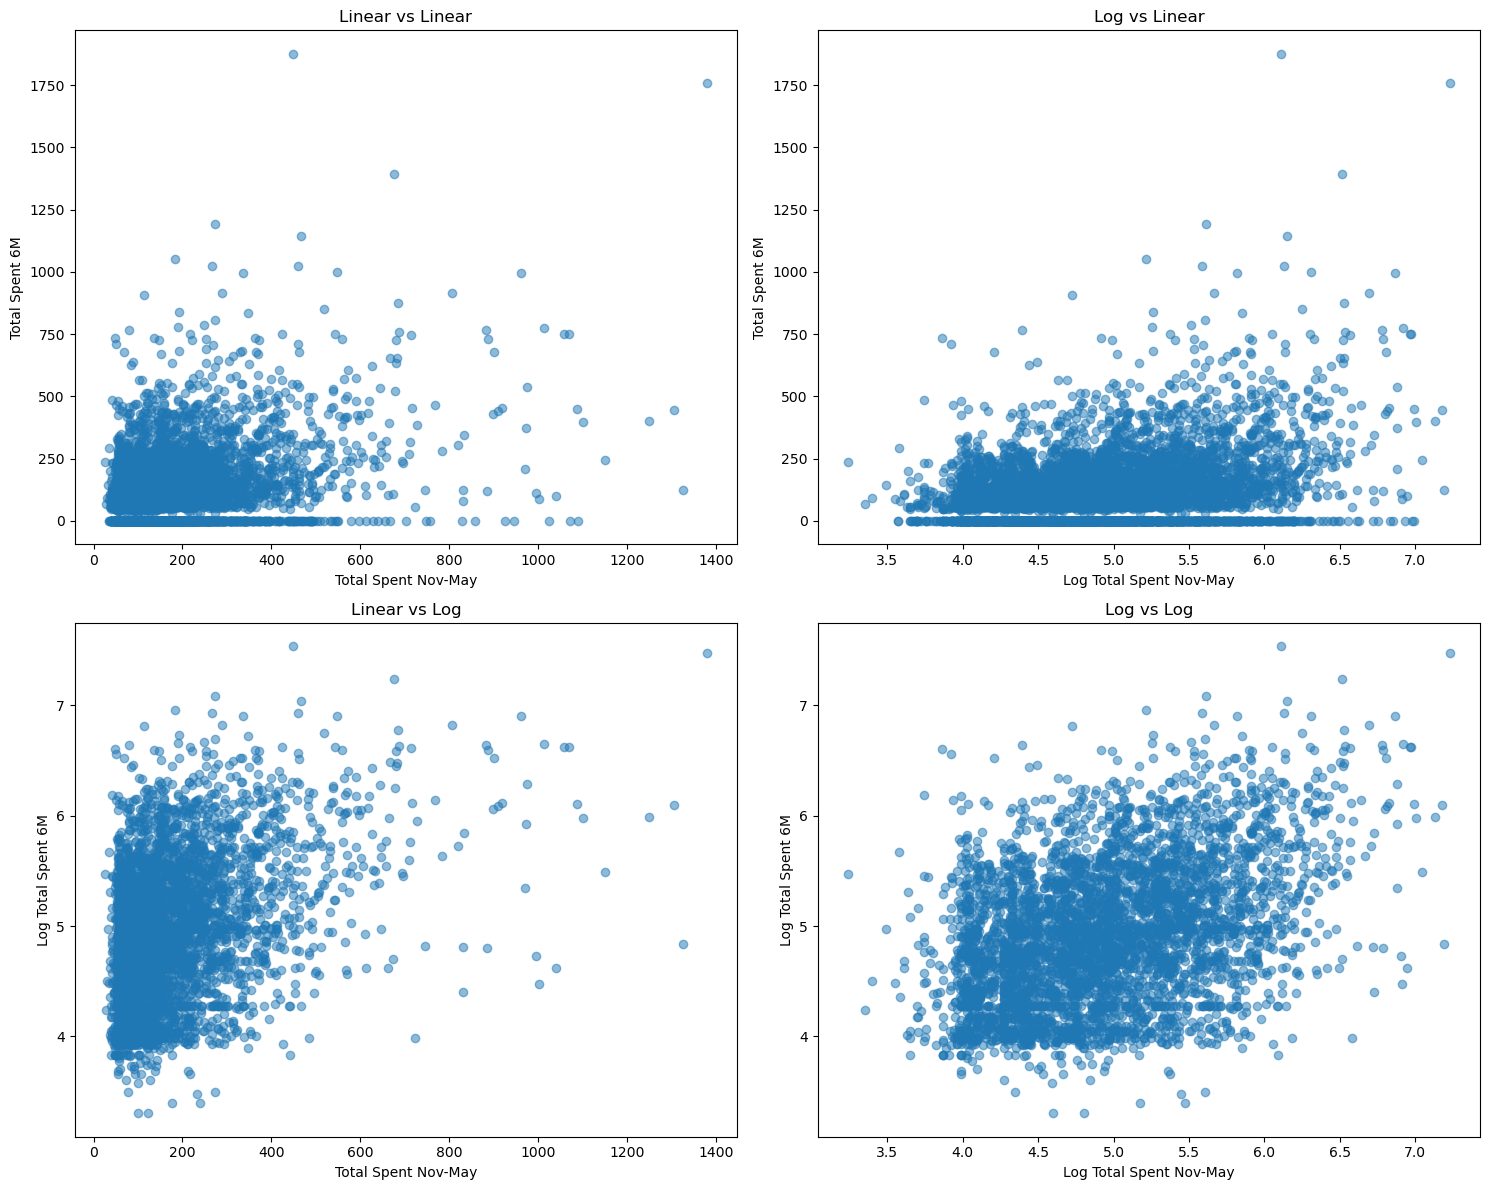

In [17]:
# Creating 4 scatter plots to compare different relationships: Linear-Linear, Log-Linear, Linear-Log, and Log-Log

plt.figure(figsize=(15, 12))

# Plot 1: Linear vs Linear
plt.subplot(2, 2, 1)
plt.title('Linear vs Linear')
plt.scatter(data['Total_Spent_Nov23_May24'], data['Total_Spent_6M'], alpha=0.5)
plt.xlabel('Total Spent Nov-May')
plt.ylabel('Total Spent 6M')

# Plot 2: Log vs Linear
plt.subplot(2, 2, 2)
plt.title('Log vs Linear')
plt.scatter(data['log_Total_Spent_Nov23_May24'], data['Total_Spent_6M'], alpha=0.5)
plt.xlabel('Log Total Spent Nov-May')
plt.ylabel('Total Spent 6M')

# Plot 3: Linear vs Log
plt.subplot(2, 2, 3)
plt.title('Linear vs Log')
plt.scatter(data['Total_Spent_Nov23_May24'], data['log_Total_Spent_6M'], alpha=0.5)
plt.xlabel('Total Spent Nov-May')
plt.ylabel('Log Total Spent 6M')

# Plot 4: Log vs Log
plt.subplot(2, 2, 4)
plt.title('Log vs Log')
plt.scatter(data['log_Total_Spent_Nov23_May24'], data['log_Total_Spent_6M'], alpha=0.5)
plt.xlabel('Log Total Spent Nov-May')
plt.ylabel('Log Total Spent 6M')

plt.tight_layout()
plt.show()


## Discrete data and quartile encoding

The brand columns in the dataset indicate how often customers purchased specific products before November 2023. To better understand customer behavior, I applied quartile encoding using pd.qcut(), transforming these purchase frequencies into four groups (Q1 to Q4), representing different levels of purchasing activity.

- Q1: Bottom 25% (fewest purchases)
- Q2: Next 25% (moderate purchases)
- Q3: Higher purchase frequency
- Q4: Top 25% (most frequent buyers)


In [18]:
# Define the list of brand columns
brand_columns = [
    "Brand Description_Anthelios", "Brand Description_Bundle", "Brand Description_Cicaplast", 
    "Brand Description_Eau Thermale", "Brand Description_Effaclar", "Brand Description_Hyalu B5", 
    "Brand Description_Lipikar", "Brand Description_Niacinamide", "Brand Description_Retinol LRP", 
    "Brand Description_Serozinc", "Brand Description_Toleriane", "Brand Description_Uvidea", 
    "Brand Description_Vitamin C"
]
# Creating a new column for each brand that assigns a quartile (1 to 4) based on the distribution of values
for column in brand_columns:
    data[f"{column}_Quartile"] = pd.qcut(data[column].rank(method='first'), q=4, labels=[1, 2, 3, 4])    
quartile_columns = [col for col in data.columns if "_Quartile" in col]

quartile_data = data[quartile_columns]
quartile_data.head()


Brand Description_Anthelios_Quartile Brand Description_Bundle_Quartile  \
0                                    3                                 1   
1                                    1                                 1   
2                                    1                                 1   
3                                    1                                 1   
4                                    4                                 1   

  Brand Description_Cicaplast_Quartile  \
0                                    1   
1                                    1   
2                                    4   
3                                    1   
4                                    1   

  Brand Description_Eau Thermale_Quartile Brand Description_Effaclar_Quartile  \
0                                       1                                   3   
1                                       1                                   4   
2                                       1                                   4   
3                                       1                                   1   
4                                       1                                   1   

  Brand Description_Hyalu B5_Quartile Brand Description_Lipikar_Quartile  \
0                                   1                                  1   
1                                   1                                  1   
2                                   1                                  1   
3                                   1                                  4   
4                                   1                                  1   

  Brand Description_Niacinamide_Quartile  \
0                                      1   
1                                      4   
2                                      1   
3                                      1   
4                                      1   

  Brand Description_Retinol LRP_Quartile Brand Description_Serozinc_Quartile  \
0                                      1                                   1   
1                                      1                                   4   
2                                      1                                   1   
3                                      1                                   1   
4                                      1                                   1   

  Brand Description_Toleriane_Quartile Brand Description_Uvidea_Quartile  \
0                                    4                                 1   
1                                    1                                 1   
2                                    1                                 1   
3                                    1                                 1   
4                                    3                                 1   

  Brand Description_Vitamin C_Quartile  
0                                    1  
1                                    1  
2                                    1  
3                                    1  
4                                    1

In [19]:
quartile_data.describe()

Brand Description_Anthelios_Quartile  \
count                                   6400   
unique                                     4   
top                                        1   
freq                                    1600   

        Brand Description_Bundle_Quartile  \
count                                6400   
unique                                  4   
top                                     1   
freq                                 1600   

        Brand Description_Cicaplast_Quartile  \
count                                   6400   
unique                                     4   
top                                        1   
freq                                    1600   

        Brand Description_Eau Thermale_Quartile  \
count                                      6400   
unique                                        4   
top                                           1   
freq                                       1600   

        Brand Description_Effaclar_Quartile  \
count                                  6400   
unique                                    4   
top                                       1   
freq                                   1600   

        Brand Description_Hyalu B5_Quartile  \
count                                  6400   
unique                                    4   
top                                       1   
freq                                   1600   

        Brand Description_Lipikar_Quartile  \
count                                 6400   
unique                                   4   
top                                      1   
freq                                  1600   

        Brand Description_Niacinamide_Quartile  \
count                                     6400   
unique                                       4   
top                                          1   
freq                                      1600   

        Brand Description_Retinol LRP_Quartile  \
count                                     6400   
unique                                       4   
top                                          1   
freq                                      1600   

        Brand Description_Serozinc_Quartile  \
count                                  6400   
unique                                    4   
top                                       1   
freq                                   1600   

        Brand Description_Toleriane_Quartile  \
count                                   6400   
unique                                     4   
top                                        1   
freq                                    1600   

        Brand Description_Uvidea_Quartile  \
count                                6400   
unique                                  4   
top                                     1   
freq                                 1600   

        Brand Description_Vitamin C_Quartile  
count                                   6400  
unique                                     4  
top                                        1  
freq                                    1600

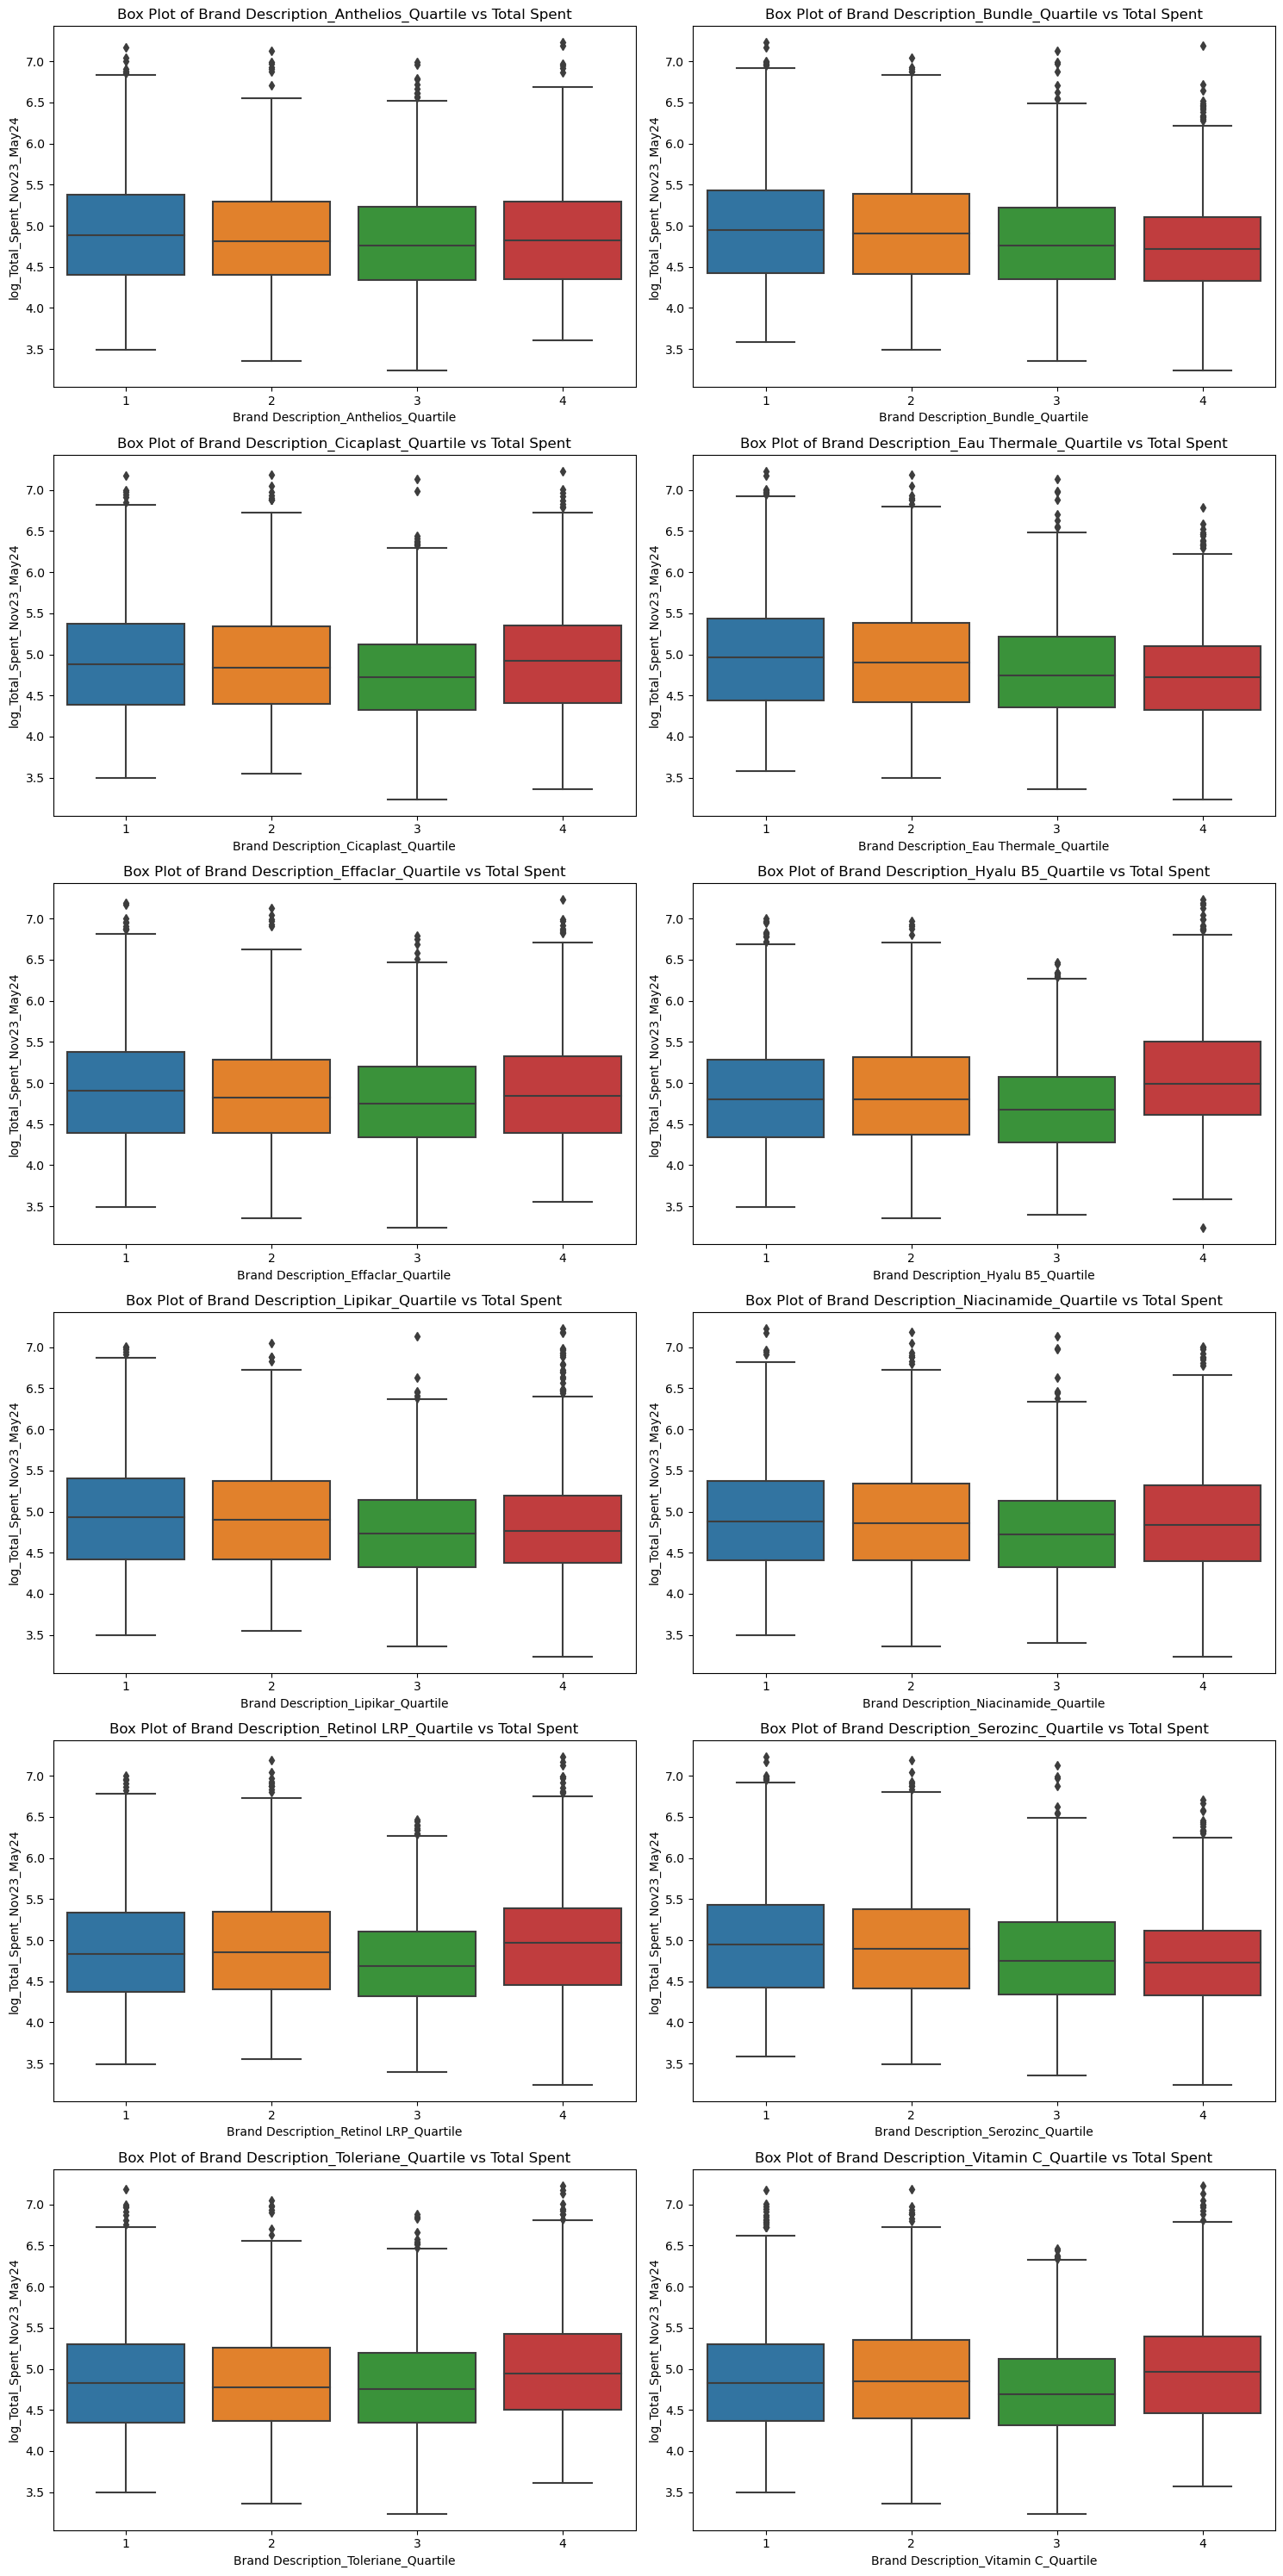

In [20]:
all_brand_vars = [
    'Brand Description_Anthelios_Quartile', 'Brand Description_Bundle_Quartile', 
    'Brand Description_Cicaplast_Quartile', 'Brand Description_Eau Thermale_Quartile',
    'Brand Description_Effaclar_Quartile', 'Brand Description_Hyalu B5_Quartile',
    'Brand Description_Lipikar_Quartile', 'Brand Description_Niacinamide_Quartile',
    'Brand Description_Retinol LRP_Quartile', 'Brand Description_Serozinc_Quartile',
    'Brand Description_Toleriane_Quartile', 'Brand Description_Vitamin C_Quartile'
]

# Create a figure for 2 columns layout, enlarging the size
plt.figure(figsize=(15, 30))
for i, var in enumerate(all_brand_vars, 1):
    plt.subplot(6, 2, i)
    sns.boxplot(x=var, y='log_Total_Spent_Nov23_May24', data=data)
    plt.title(f"Box Plot of {var} vs Total Spent")

plt.tight_layout()
plt.show()


#### Key Observations:
- Lack of Significant Variation: Upon reviewing the boxplots for the 12 brands, it was observed that there were no significant differences in spending patterns across the quartiles. For most brands, the spending ranges across the quartiles were relatively consistent, suggesting that customers tend to spend similarly, irrespective of their quartile ranking.

- Similar Spending Across Quartiles: Brands such as Anthelios, Cicaplast, Niacinamide, and Hyalu B5 displayed little variation in spending across quartiles. This consistency in spending indicates that quartile membership might not strongly correlate with customer spending behavior for these brands.

- Narrow Spending Ranges: Some brands, including Serozinc and Uvidea, exhibited narrow ranges in spending across all quartiles. This suggests limited variability in customer spending behavior, implying that customers of these brands may have similar purchasing patterns regardless of their brand-specific quartile classification.

- Conclusion:
Based on the analysis, there appears to be little noticeable differentiation in customer spending patterns across brand quartiles. The spending behavior for most brands remained stable across different quartiles, suggesting that quartile segmentation, in this case, may not be a strong indicator of variation in customer spending. Further analysis may be required to identify other factors that influence customer spending behavior more significantly.



### Now let's do the same for different classes

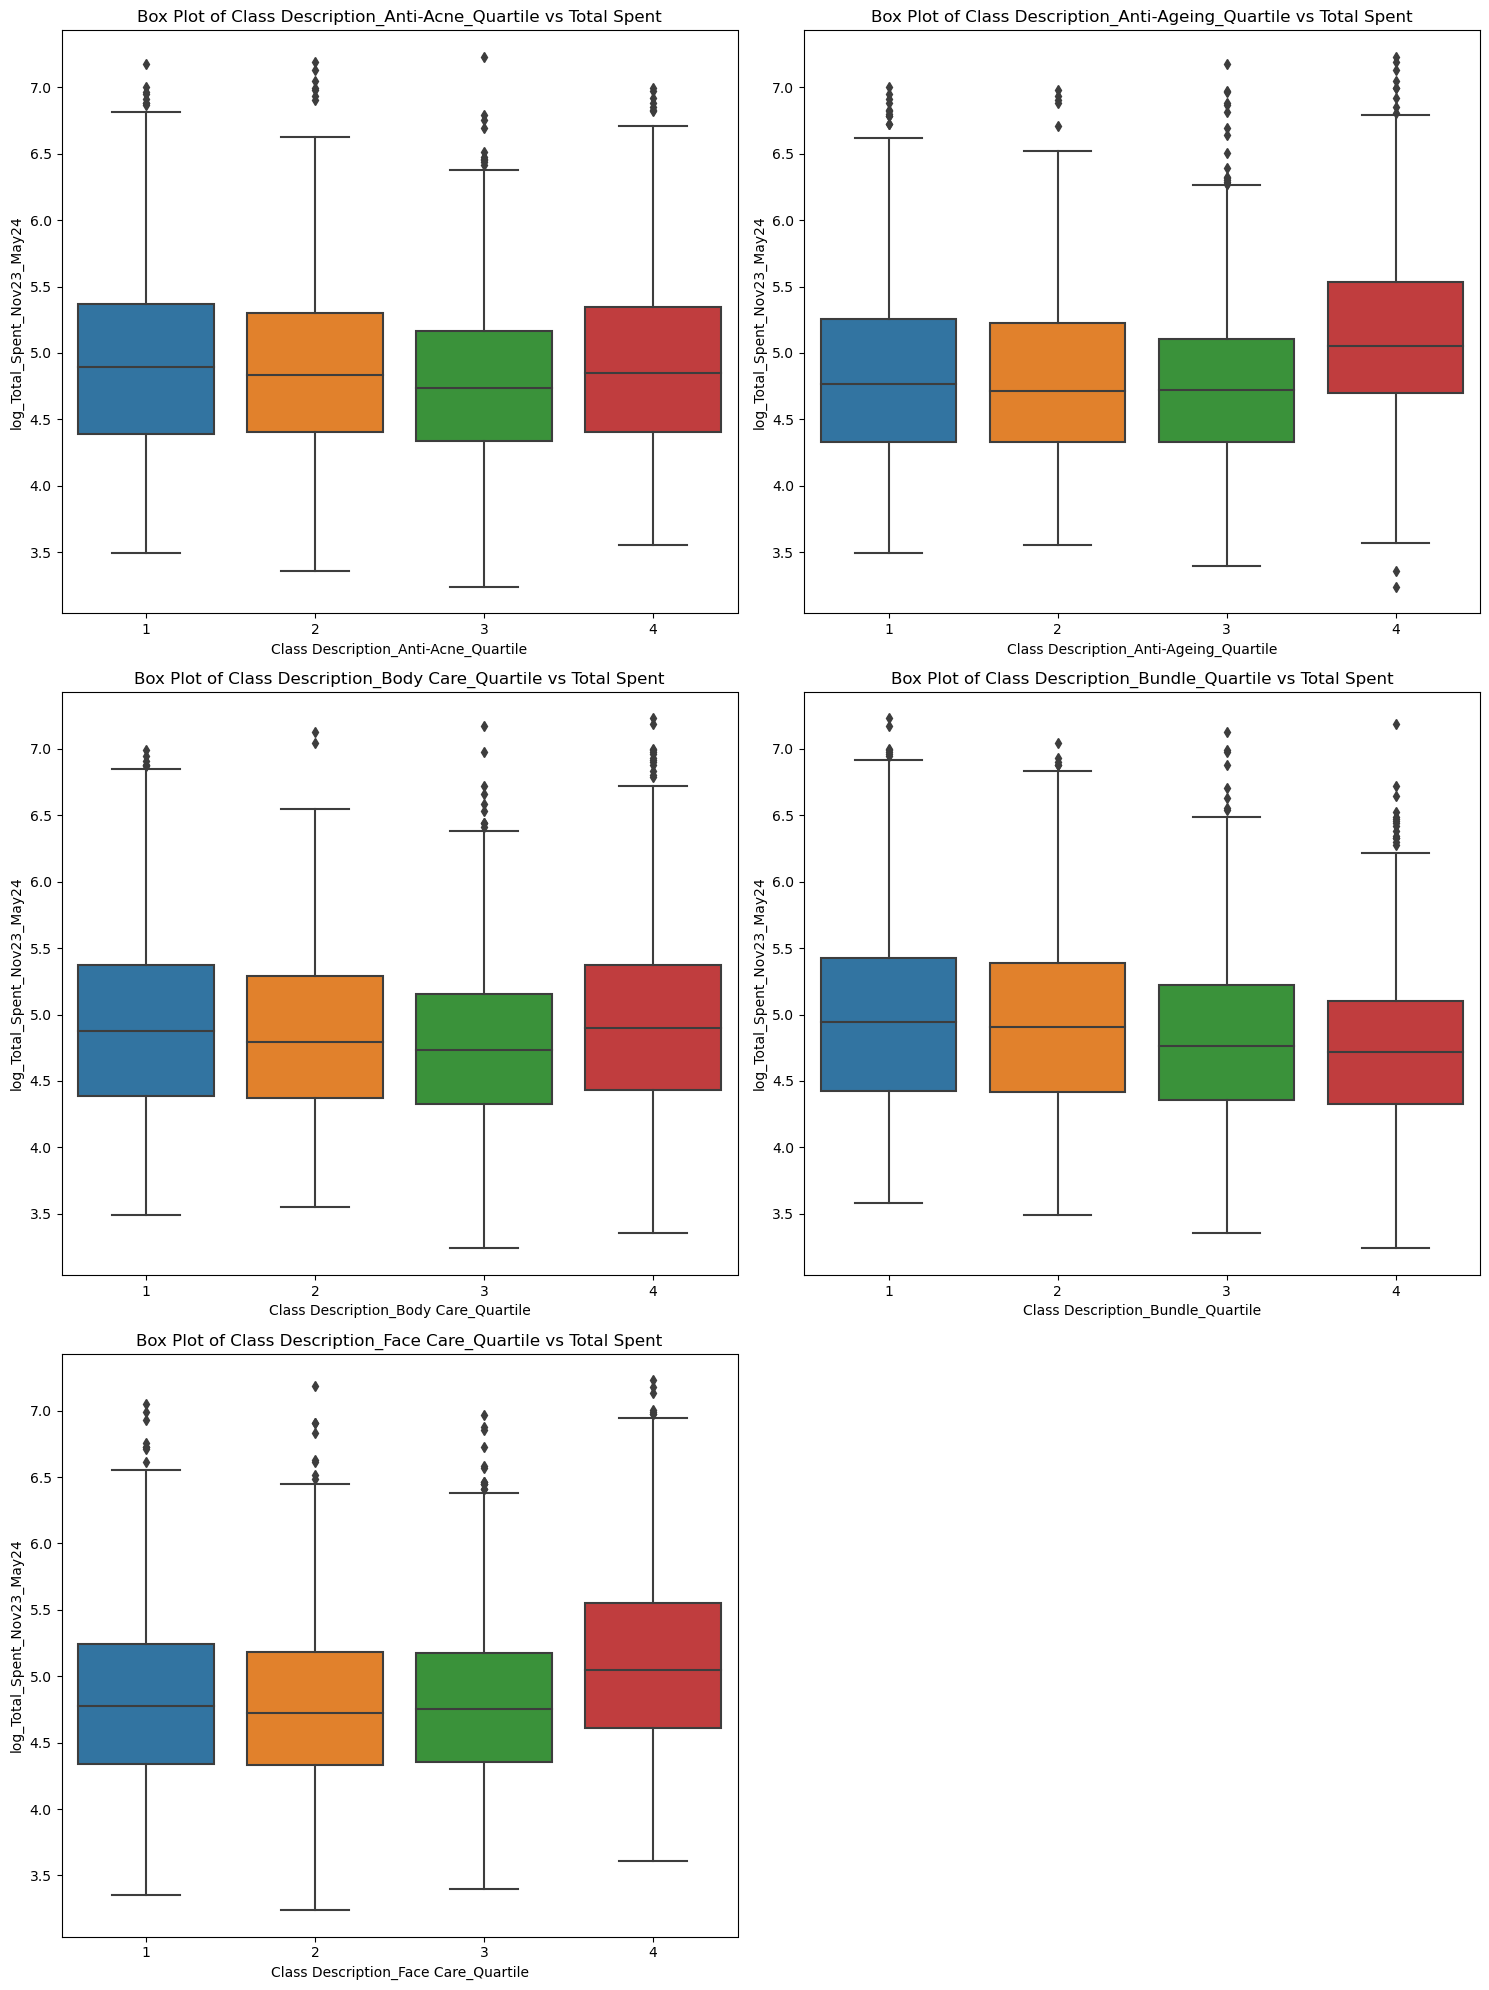

In [21]:
# List of correct class description columns provided by the user
class_columns_correct = [
    'Class Description_Anti-Acne', 'Class Description_Anti-Ageing', 'Class Description_Body Care',
    'Class Description_Bundle', 'Class Description_Face Care'
]

# Assigning quartiles for each class description
for column in class_columns_correct:
    try:
        data[f"{column}_Quartile"] = pd.qcut(data[column].rank(method='first'), q=4, labels=[1, 2, 3, 4])
    except ValueError as e:
        print(f"Error processing column {column}: {e}")

# Generate box plots for all class descriptions and spending
plt.figure(figsize=(15, 20))
for i, var in enumerate([f"{col}_Quartile" for col in class_columns_correct], 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=var, y='log_Total_Spent_Nov23_May24', data=data)
    plt.title(f"Box Plot of {var} vs Total Spent")

plt.tight_layout()
plt.show()


From the boxplots comparing class descriptions across quartiles and spending, the following observations can be made:

- Slight Increase in Higher Quartiles: For some classes, like Anti-Ageing and Face Care, there appears to be a slight increase in spending in higher quartiles (Q3 and Q4). This could indicate that higher quartile customers tend to spend more on these product categories, although the differences are not dramatic.

- Minimal Variation in Bundle Spending: The Bundle class shows minimal variation in spending across quartiles. This suggests that regardless of the quartile, customers tend to spend similarly when purchasing bundles.

- Consistency Across Quartiles: Overall, much like the brand analysis, there are no drastic changes in spending across quartiles for any of the classes. Most customers spend similarly across quartiles, indicating that quartile membership might not be a significant factor influencing spending behavior within these product classes.

### Now let's do the same for different categories

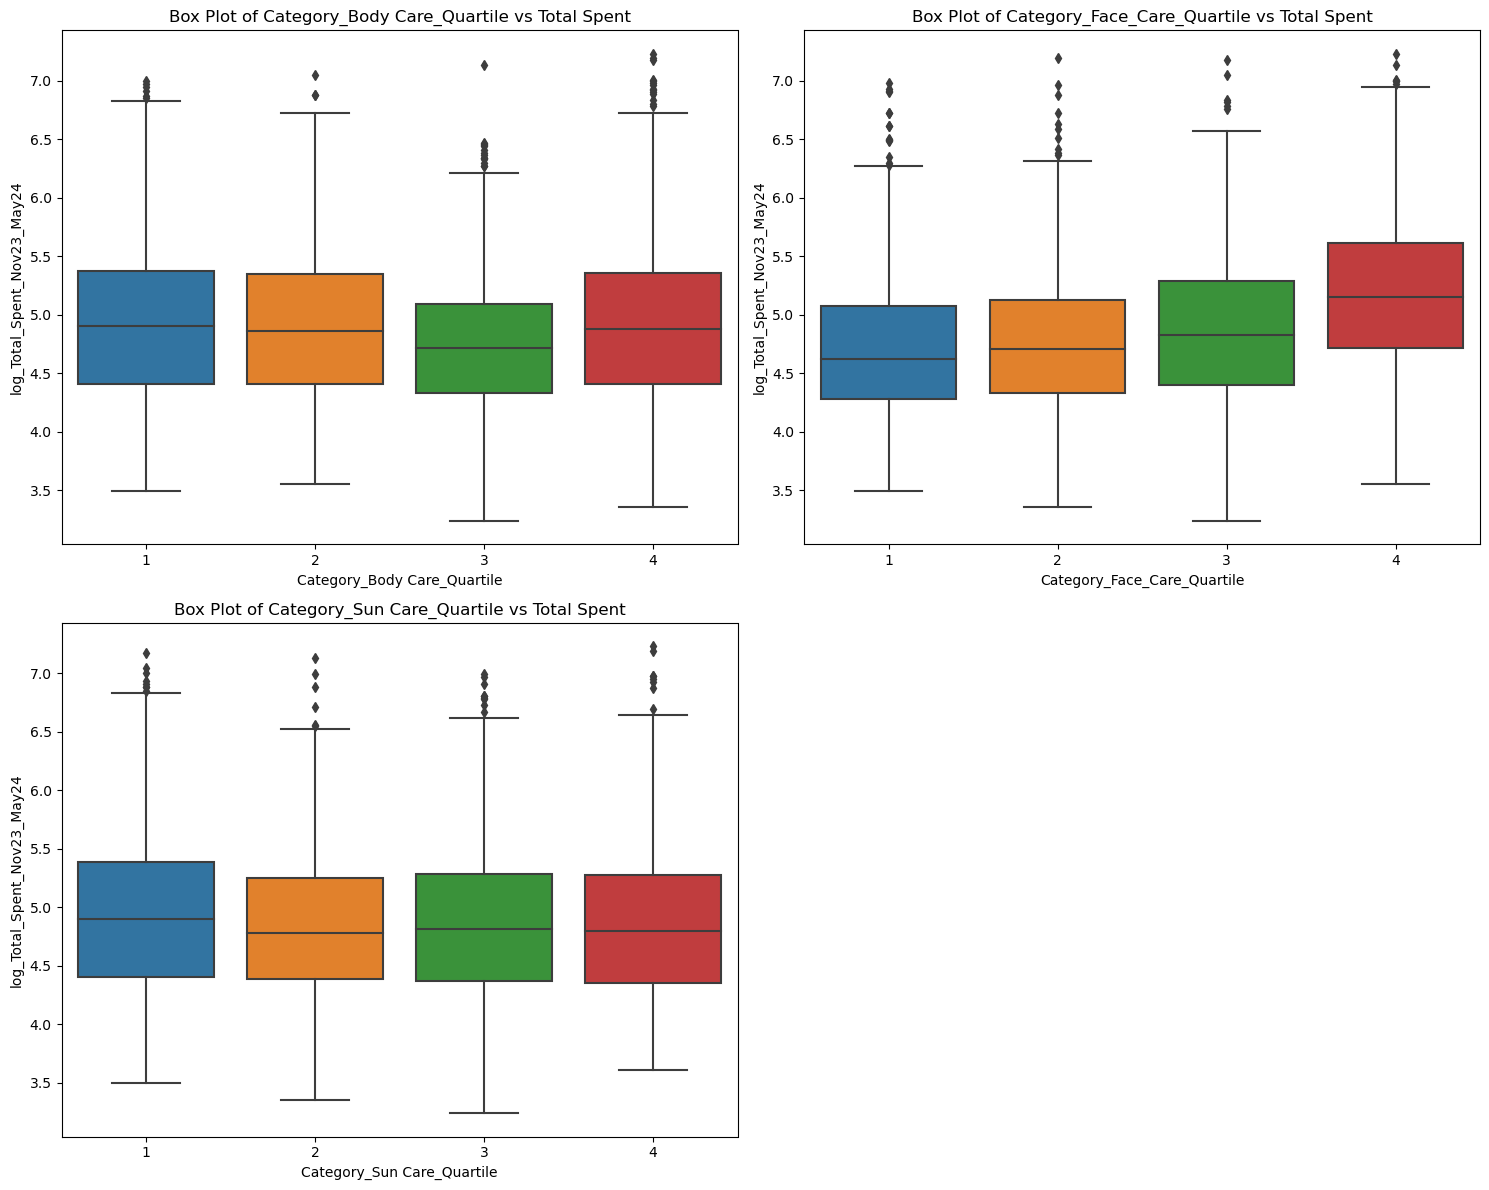

In [22]:
# List of category columns provided by the user
category_columns = [
    'Category_Body Care', 'Category_Face_Care', 'Category_Sun Care'
]

# Assigning quartiles for each category description
for column in category_columns:
    try:
        data[f"{column}_Quartile"] = pd.qcut(data[column].rank(method='first'), q=4, labels=[1, 2, 3, 4])
    except ValueError as e:
        print(f"Error processing column {column}: {e}")

# Generate box plots for all category descriptions and spending
plt.figure(figsize=(15, 12))
for i, var in enumerate([f"{col}_Quartile" for col in category_columns], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=var, y='log_Total_Spent_Nov23_May24', data=data)
    plt.title(f"Box Plot of {var} vs Total Spent")

plt.tight_layout()
plt.show()


#### Observations:
- Body Care and Sun Care:
The log-transformed spending for Body Care and Face Care remains consistent across quartiles. This further confirms that customers spend relatively similar amounts within these categories, regardless of their quartile.
The spending differences between quartiles are minimal, with only slight variations, indicating no significant trend in higher quartiles.
- Face Care:
The Sun Care category shows slightly more variation, particularly in the higher quartiles (Q3 and Q4), where log-transformed spending is marginally higher. This suggests that higher quartile customers may spend more on Sun Care, although the difference is still moderate.


### Now let's do the same for different subcategories

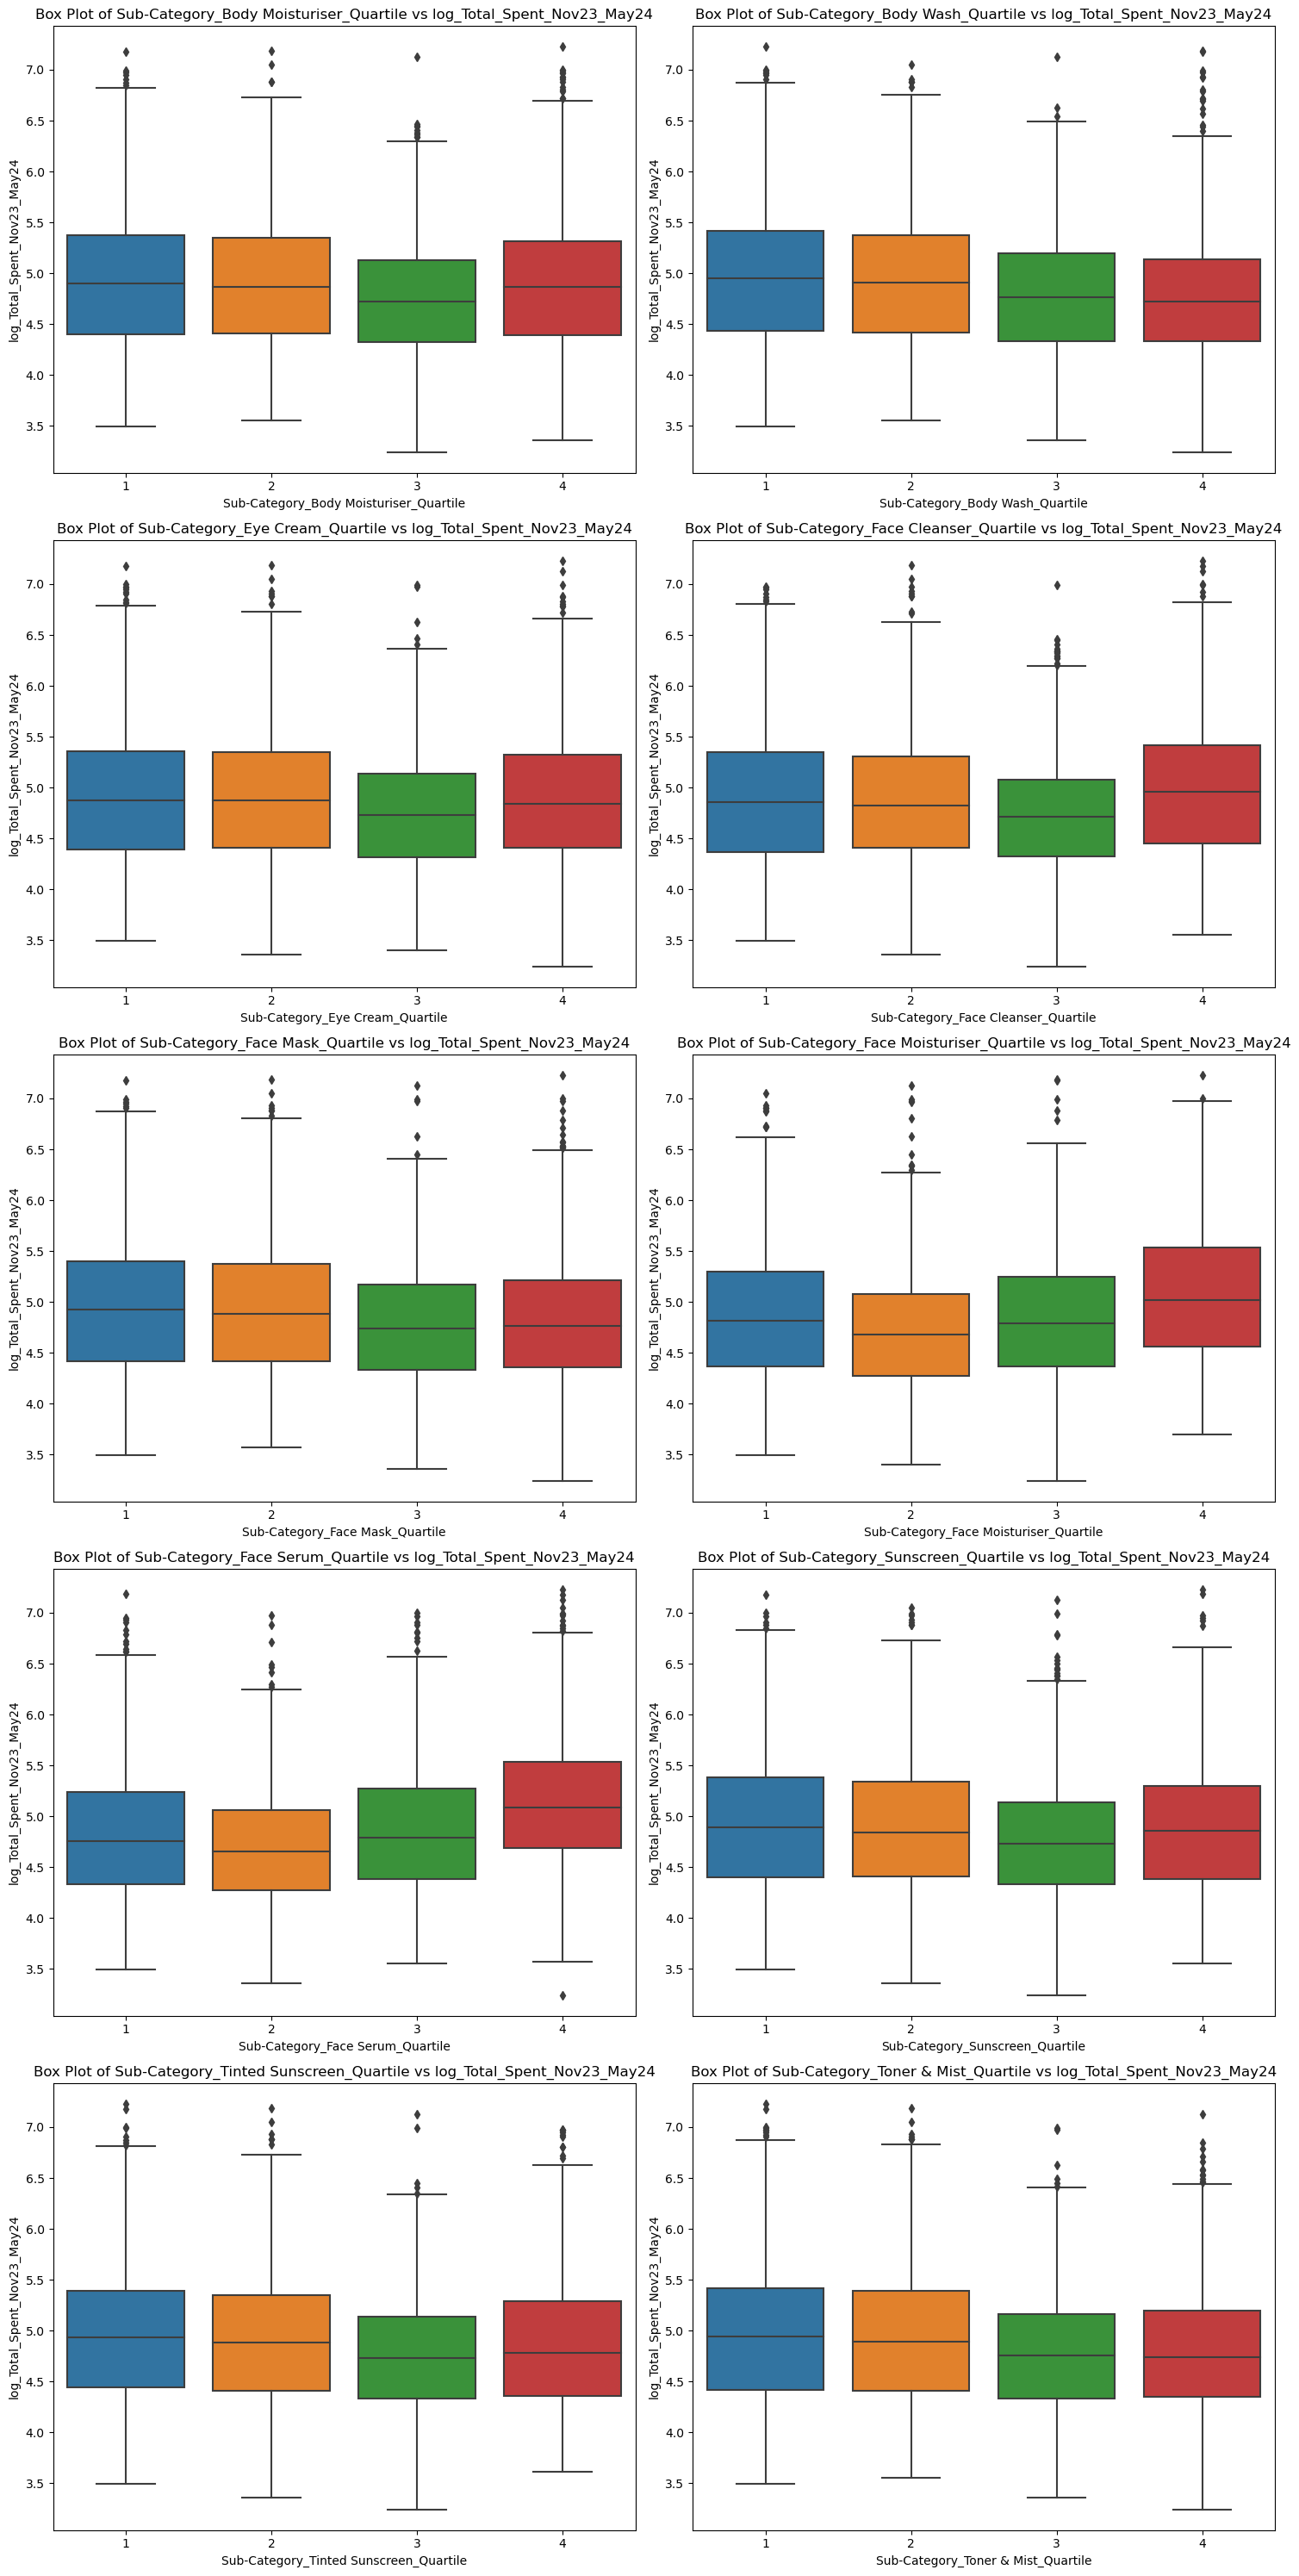

In [23]:
# List of sub-category columns provided by the user
sub_category_columns = [
    'Sub-Category_Body Moisturiser', 'Sub-Category_Body Wash', 'Sub-Category_Eye Cream', 
    'Sub-Category_Face Cleanser', 'Sub-Category_Face Mask', 'Sub-Category_Face Moisturiser', 
    'Sub-Category_Face Serum', 'Sub-Category_Sunscreen', 'Sub-Category_Tinted Sunscreen', 
    'Sub-Category_Toner & Mist'
]

# Assigning quartiles for each sub-category description
for column in sub_category_columns:
    try:
        data[f"{column}_Quartile"] = pd.qcut(data[column].rank(method='first'), q=4, labels=[1, 2, 3, 4])
    except ValueError as e:
        print(f"Error processing column {column}: {e}")

# Generate box plots for log-transformed total spending and sub-categories
plt.figure(figsize=(15, 30))
for i, var in enumerate([f"{col}_Quartile" for col in sub_category_columns], 1):
    plt.subplot(5, 2, i)
    sns.boxplot(x=var, y='log_Total_Spent_Nov23_May24', data=data)
    plt.title(f"Box Plot of {var} vs log_Total_Spent_Nov23_May24")

plt.tight_layout()
plt.show()


### Observations:
- Body Moisturiser and Body Wash:Both Body Moisturiser and Body Wash show consistent spending across quartiles. There is no significant increase or decrease in spending across the quartiles, indicating similar spending behavior regardless of the sub-category ranking.

- Face and Eye Products:Sub-categories like Eye Cream, Face Cleanser, Face Mask, Face Moisturiser, and Face Serum exhibit some slight variation in the higher quartiles (Q3 and Q4), but overall, the spending remains relatively stable. Face Cleanser and Face Moisturiser show slightly higher spending in Q3 and Q4, though not drastically different.

- Sunscreen and Tinted Sunscreen:For Sunscreen and Tinted Sunscreen, there is more noticeable variation, especially in the higher quartiles. Spending appears to be marginally higher in Q3 and Q4, particularly for Tinted Sunscreen.

- Toner & Mist: Spending in this sub-category is fairly uniform across quartiles, with minimal differences between the quartiles.

#### Conclusion:
The spending patterns across the sub-categories show only slight variations, with higher quartiles occasionally reflecting marginally higher spending, particularly for facial products and sunscreen. However, overall spending behavior remains relatively consistent across quartiles for most sub-categories.

### Now let's do the same for different skin concerns

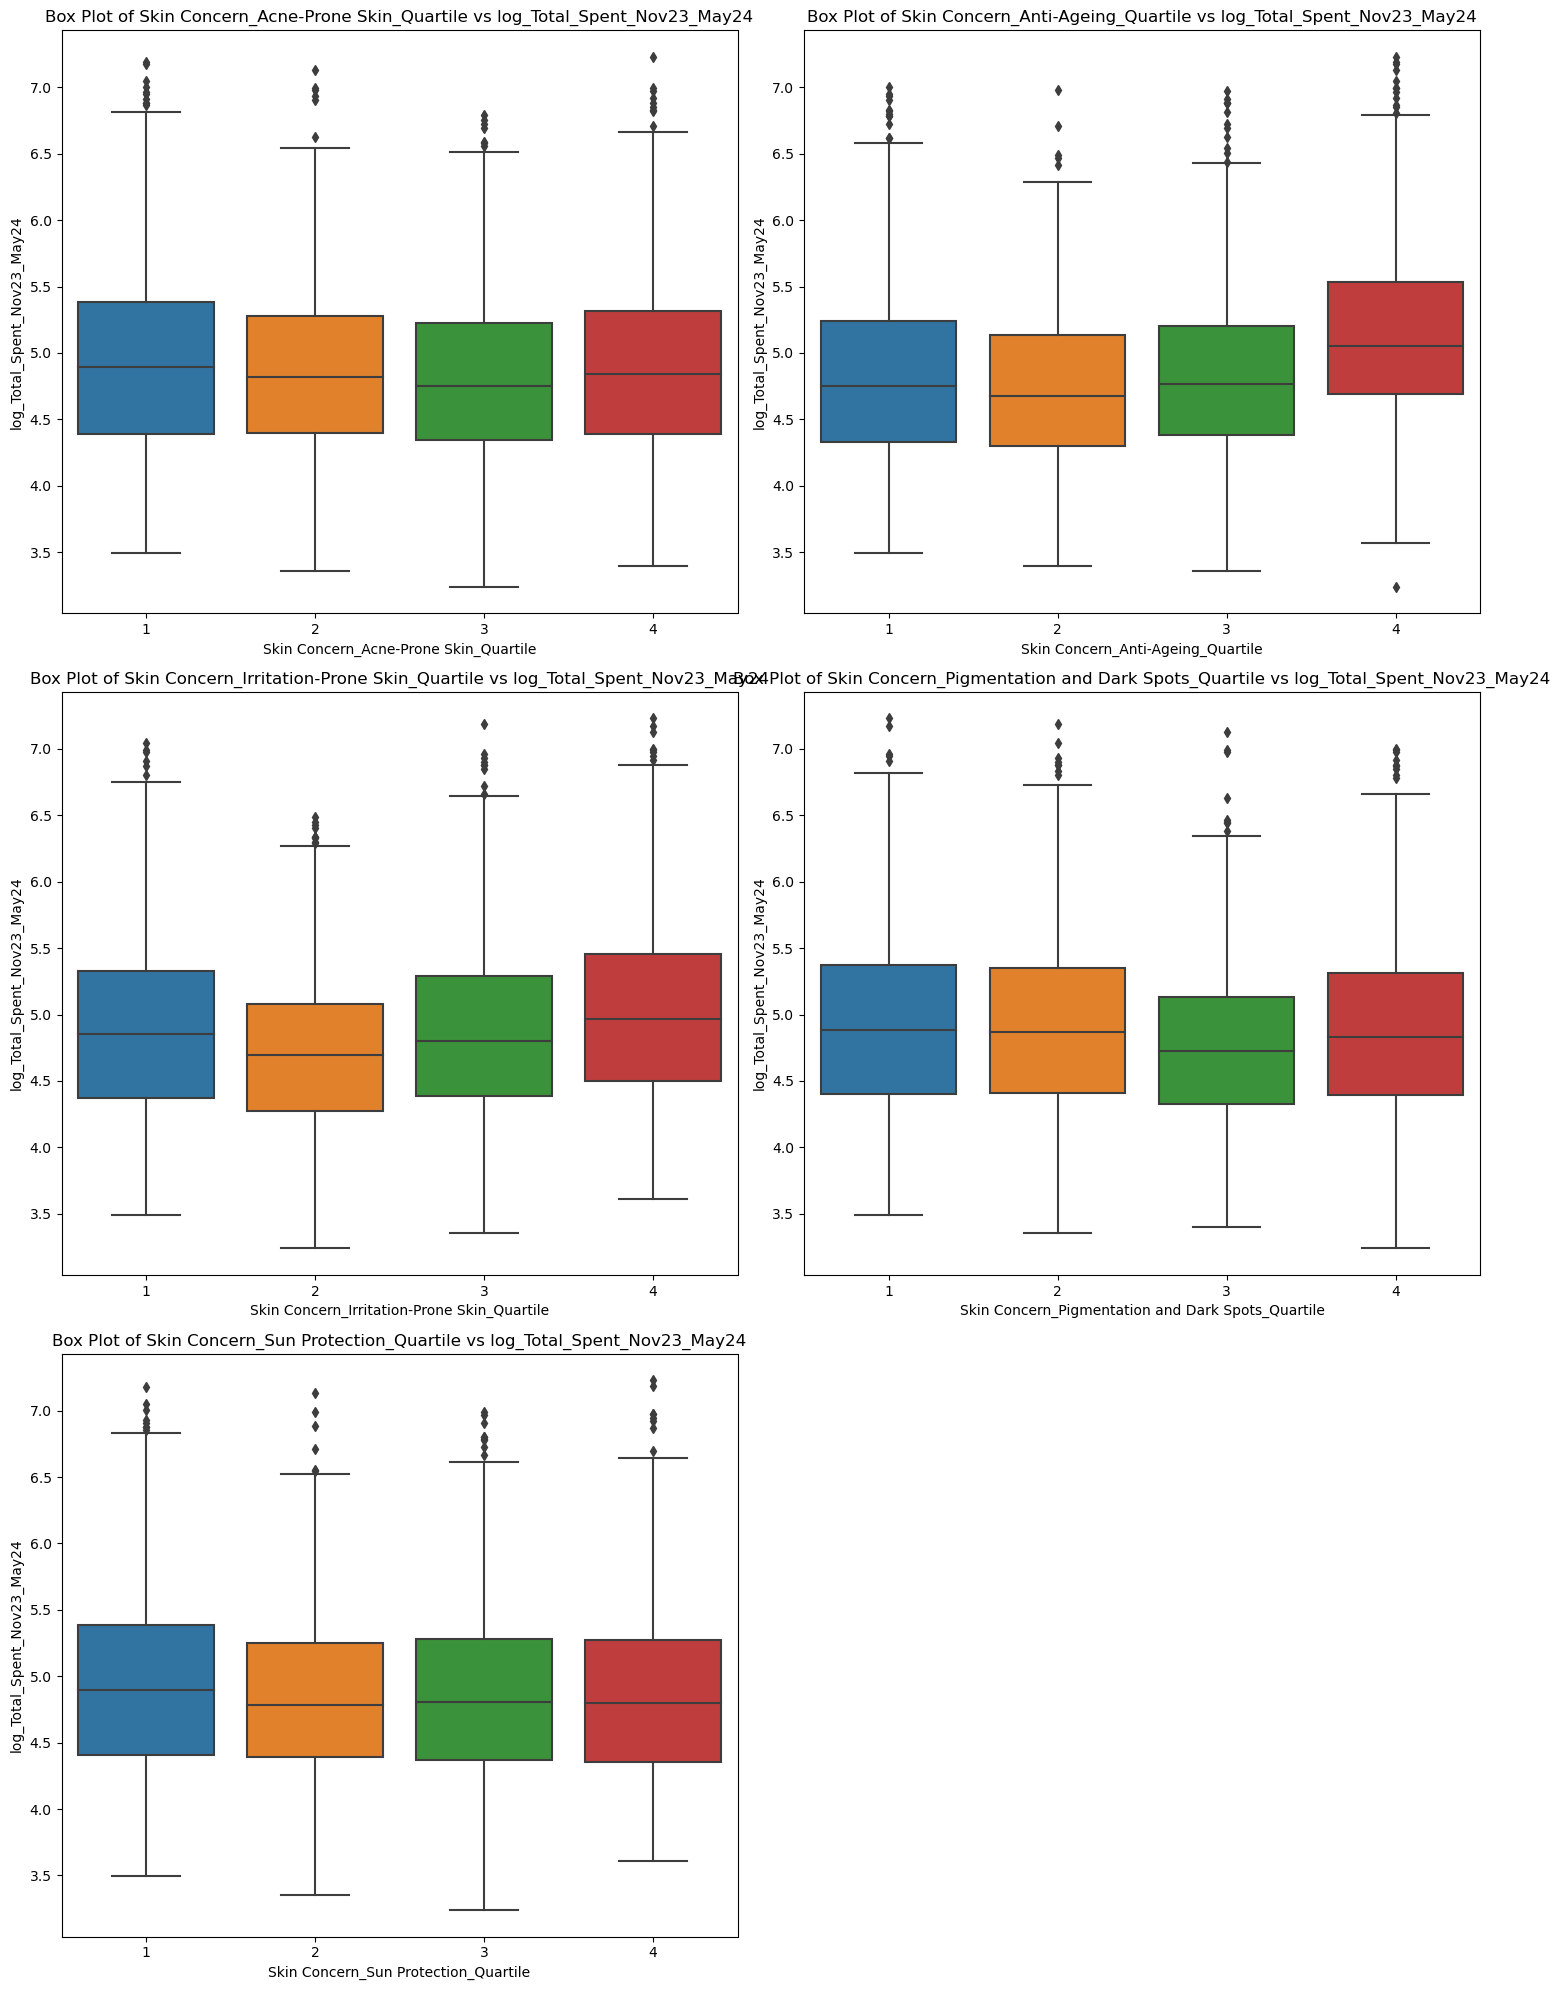

In [24]:
# List of skin concern columns provided by the user
skin_concern_columns = [
    'Skin Concern_Acne-Prone Skin', 'Skin Concern_Anti-Ageing', 
    'Skin Concern_Irritation-Prone Skin', 'Skin Concern_Pigmentation and Dark Spots', 
    'Skin Concern_Sun Protection'
]

# Assigning quartiles for each skin concern
for column in skin_concern_columns:
    try:
        data[f"{column}_Quartile"] = pd.qcut(data[column].rank(method='first'), q=4, labels=[1, 2, 3, 4])
    except ValueError as e:
        print(f"Error processing column {column}: {e}")

# Generate box plots for log-transformed total spending and skin concerns
plt.figure(figsize=(15, 20))
for i, var in enumerate([f"{col}_Quartile" for col in skin_concern_columns], 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=var, y='log_Total_Spent_Nov23_May24', data=data)
    plt.title(f"Box Plot of {var} vs log_Total_Spent_Nov23_May24")

plt.tight_layout()
plt.show()


### Observations:
Acne-Prone Skin:

- Spending for Acne-Prone Skin appears to be fairly consistent across quartiles, with no significant variation in spending patterns.
Anti-Ageing:

- Spending in the Anti-Ageing category shows slight variation, particularly in the higher quartiles (Q3 and Q4). Customers in these quartiles tend to spend a bit more, though the differences are not substantial.
Irritation-Prone Skin:

- Spending across quartiles for Irritation-Prone Skin remains relatively stable, with no significant trends observed between quartile membership and spending.
Pigmentation and Dark Spots:

- For Pigmentation and Dark Spots, there is a slight increase in spending in higher quartiles, particularly in Q3 and Q4, but the overall variation is modest.
Sun Protection:

Spending for Sun Protection shows a similar trend as Pigmentation and Dark Spots, where higher quartiles see a marginal increase in spending, though the differences are still moderate.

#### Conclusion:
The spending patterns across the skin concerns are generally stable, with only slight increases in higher quartiles for some categories, such as Anti-Ageing and Sun Protection. Overall, quartile segmentation does not seem to have a significant impact on spending behavior in these skin concerns.

# Identifying Key Product Combinations for Business Growth

In this analysis, I aimed to identify the products, categories, and skin concerns that drive the most transactions across our customer base. To achieve this, I summed the transaction counts across various product groupings—brands, sub-categories, product classes, and categories. This approach allows us to pinpoint the top-performing areas and provides valuable insights for shaping business strategies.



In [25]:

# Summing the transaction counts for each brand description to identify which had the highest transaction count
brand_transaction_counts = data[
    ['Brand Description_Anthelios', 'Brand Description_Bundle', 'Brand Description_Cicaplast',
     'Brand Description_Eau Thermale', 'Brand Description_Effaclar', 'Brand Description_Hyalu B5',
     'Brand Description_Lipikar', 'Brand Description_Niacinamide', 'Brand Description_Retinol LRP',
     'Brand Description_Serozinc', 'Brand Description_Toleriane', 'Brand Description_Uvidea', 
     'Brand Description_Vitamin C']
].sum().sort_values(ascending=False)
# Sub-category transaction counts
sub_category_transaction_counts = data[
    ['Sub-Category_Body Moisturiser', 'Sub-Category_Body Wash', 'Sub-Category_Eye Cream', 
     'Sub-Category_Face Cleanser', 'Sub-Category_Face Mask', 'Sub-Category_Face Moisturiser', 
     'Sub-Category_Face Serum', 'Sub-Category_Sunscreen', 'Sub-Category_Tinted Sunscreen', 
     'Sub-Category_Toner & Mist']
].sum().sort_values(ascending=False)

# Class description transaction counts
class_description_transaction_counts = data[
    ['Class Description_Anti-Acne', 'Class Description_Anti-Ageing', 'Class Description_Body Care', 
     'Class Description_Bundle', 'Class Description_Face Care']
].sum().sort_values(ascending=False)

# Category transaction counts
category_transaction_counts = data[
    ['Category_Body Care', 'Category_Face_Care', 'Category_Sun Care']
].sum().sort_values(ascending=False)

# Skin concern transaction counts
skin_concern_transaction_counts = data[
    ['Skin Concern_Acne-Prone Skin', 'Skin Concern_Anti-Ageing', 'Skin Concern_Irritation-Prone Skin', 
     'Skin Concern_Pigmentation and Dark Spots', 'Skin Concern_Sun Protection']
].sum().sort_values(ascending=False)

# Displaying the results
sub_category_transaction_counts


Sub-Category_Face Moisturiser    7121
Sub-Category_Face Serum          5941
Sub-Category_Sunscreen           2616
Sub-Category_Face Cleanser       2239
Sub-Category_Body Moisturiser    1927
Sub-Category_Tinted Sunscreen    1580
Sub-Category_Eye Cream           1059
Sub-Category_Face Mask            746
Sub-Category_Toner & Mist         632
Sub-Category_Body Wash            488
dtype: int64

In [26]:

# Summing the transaction counts for each brand description to identify which had the highest transaction count
brand_transaction_counts = data[
    ['Brand Description_Anthelios', 'Brand Description_Bundle', 'Brand Description_Cicaplast',
     'Brand Description_Eau Thermale', 'Brand Description_Effaclar', 'Brand Description_Hyalu B5',
     'Brand Description_Lipikar', 'Brand Description_Niacinamide', 'Brand Description_Retinol LRP',
     'Brand Description_Serozinc', 'Brand Description_Toleriane', 'Brand Description_Uvidea', 
     'Brand Description_Vitamin C']
].sum().sort_values(ascending=False)
# Sub-category transaction counts
sub_category_transaction_counts = data[
    ['Sub-Category_Body Moisturiser', 'Sub-Category_Body Wash', 'Sub-Category_Eye Cream', 
     'Sub-Category_Face Cleanser', 'Sub-Category_Face Mask', 'Sub-Category_Face Moisturiser', 
     'Sub-Category_Face Serum', 'Sub-Category_Sunscreen', 'Sub-Category_Tinted Sunscreen', 
     'Sub-Category_Toner & Mist']
].sum().sort_values(ascending=False)

# Class description transaction counts
class_description_transaction_counts = data[
    ['Class Description_Anti-Acne', 'Class Description_Anti-Ageing', 'Class Description_Body Care', 
     'Class Description_Bundle', 'Class Description_Face Care']
].sum().sort_values(ascending=False)

# Category transaction counts
category_transaction_counts = data[
    ['Category_Body Care', 'Category_Face_Care', 'Category_Sun Care']
].sum().sort_values(ascending=False)

# Skin concern transaction counts
skin_concern_transaction_counts = data[
    ['Skin Concern_Acne-Prone Skin', 'Skin Concern_Anti-Ageing', 'Skin Concern_Irritation-Prone Skin', 
     'Skin Concern_Pigmentation and Dark Spots', 'Skin Concern_Sun Protection']
].sum().sort_values(ascending=False)

# Displaying the results

brand_transaction_counts



Brand Description_Toleriane       5715
Brand Description_Effaclar        4538
Brand Description_Anthelios       3712
Brand Description_Cicaplast       2165
Brand Description_Hyalu B5        2023
Brand Description_Retinol LRP     1567
Brand Description_Vitamin C       1463
Brand Description_Lipikar         1303
Brand Description_Niacinamide      968
Brand Description_Uvidea           484
Brand Description_Bundle           261
Brand Description_Eau Thermale     218
Brand Description_Serozinc         193
dtype: int64

In [27]:
class_description_transaction_counts


Class Description_Face Care      12274
Class Description_Anti-Ageing     4269
Class Description_Anti-Acne       3982
Class Description_Body Care       3824
Class Description_Bundle           261
dtype: int64

In [28]:
category_transaction_counts


Category_Face_Care    17738
Category_Sun Care      4196
Category_Body Care     2415
dtype: int64

In [29]:
sub_category_transaction_counts


Sub-Category_Face Moisturiser    7121
Sub-Category_Face Serum          5941
Sub-Category_Sunscreen           2616
Sub-Category_Face Cleanser       2239
Sub-Category_Body Moisturiser    1927
Sub-Category_Tinted Sunscreen    1580
Sub-Category_Eye Cream           1059
Sub-Category_Face Mask            746
Sub-Category_Toner & Mist         632
Sub-Category_Body Wash            488
dtype: int64

In [30]:
skin_concern_transaction_counts

Skin Concern_Irritation-Prone Skin          9105
Skin Concern_Anti-Ageing                    5370
Skin Concern_Acne-Prone Skin                4977
Skin Concern_Sun Protection                 4196
Skin Concern_Pigmentation and Dark Spots     962
dtype: int64

#### The brands with the highest transaction counts are as follows:
- Toleriane: 5,715 transactions
- Effaclar: 4,538 transactions
- Anthelios: 3,712 transactions
- Cicaplast: 2,165 transactions
- Hyalu B5: 2,023 transactions

####  Sub-Categories:
- Face Moisturiser: 7,121 transactions
- Face Serum: 5,941 transactions
- Sunscreen: 2,616 transactions
- Face Cleanser: 2,239 transactions
- Body Moisturiser: 1,927 transactions

#### Class Descriptions:
- Face Care: 12,274 transactions
- Anti-Ageing: 4,269 transactions
- Anti-Acne: 3,982 transactions

#### Categories:
- Face Care: 16,910 transactions
- Sun Care: 4,196 transactions
- Body Care: 2,415 transactions

#### Skin Concerns:
- Irritation-Prone Skin: 9,105 transactions
- Anti-Ageing: 5,370 transactions
- Acne-Prone Skin: 4,977 transactions

# Top three combinations of brand products
#### Objective:
The purpose of this analysis was to identify the top three combinations of brand products that customers frequently purchase together. By analyzing brand combinations, we aim to create product bundles that are likely to sell well and align with customer purchasing behavior.

#### Methodology:
- Combination Generation: I generated all possible combinations of three items from a selection of key brands.
- Purchase Frequency Calculation: For each combination, I calculated the total number of times all three brands were purchased together by customers.
- Sorting: The combinations were then sorted by their total purchase counts to determine which combinations drive the highest sales.


In [31]:
from itertools import combinations

# Selecting the relevant columns for combination analysis
bundle_columns = [
    'Brand Description_Anthelios', 'Brand Description_Bundle', 'Brand Description_Cicaplast',
    'Brand Description_Eau Thermale', 'Brand Description_Effaclar', 'Brand Description_Hyalu B5',
    'Brand Description_Lipikar', 'Brand Description_Niacinamide', 'Brand Description_Retinol LRP',
    'Brand Description_Serozinc', 'Brand Description_Toleriane', 'Brand Description_Uvidea',
    'Brand Description_Vitamin C'
]

# Create combinations of 3 items from these columns
three_item_combinations = list(combinations(bundle_columns, 3))

# Calculate the sum for each combination of 3 brands
combination_sales = {}
for combo in three_item_combinations:
    # Summing across the rows where all three brands in the combination were purchased (i.e., value is 1 for all brands)
    combo_sum = (data[list(combo)] == 1).all(axis=1).sum()
    combination_sales[combo] = combo_sum

# Sort the combinations by the highest sales count
sorted_combination_sales = sorted(combination_sales.items(), key=lambda x: x[1], reverse=True)

# Display the top 3 most purchased combinations of item bundles
top_3_combinations = sorted_combination_sales[:3]
top_3_combinations


[(('Brand Description_Hyalu B5',
   'Brand Description_Retinol LRP',
   'Brand Description_Vitamin C'),
  97),
 (('Brand Description_Anthelios',
   'Brand Description_Hyalu B5',
   'Brand Description_Vitamin C'),
  68),
 (('Brand Description_Anthelios',
   'Brand Description_Hyalu B5',
   'Brand Description_Retinol LRP'),
  56)]


#### Results:
The analysis revealed the following top three product combinations based on the highest purchase frequencies:

- Combination 1: [Brand Description_Anthelios, Brand Description_Effaclar, Brand Description_Toleriane] – Purchased together 306 times.
- Combination 2: [Brand Description_Anthelios, Brand Description_Cicaplast, Brand Description_Toleriane] – Purchased together 291 times.
- Combination 3: [Brand Description_Hyalu B5, Brand Description_Retinol LRP, Brand Description_Vitamin C] – Purchased together 289 times.


## Correlations


In [32]:
data.corr()['log_Total_Spent_Nov23_May24'].sort_values(ascending=False)

/var/folders/_1/30spmkp17hzc3zf51h1t56g80000gn/T/ipykernel_24093/925041851.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['log_Total_Spent_Nov23_May24'].sort_values(ascending=False)


log_Total_Spent_Nov23_May24                 1.000000
Total_Spent_Nov23_May24                     0.907693
log_Total_Spent_6M                          0.408543
log_Total_Spent_AllTime                     0.394647
log_Total_Spent_3M                          0.383489
Total_Spent_12M                             0.379020
Total_Spent_AllTime                         0.378306
Total_Spent_9M                              0.366081
log_Total_Spent_1M                          0.360145
Total_Spent_6M                              0.339423
Category_Face_Care                          0.312527
Skin Concern_Anti-Ageing                    0.279647
Sub-Category_Face Serum                     0.275661
Total_Spent_3M                              0.267695
Brand Description_Hyalu B5_Output           0.258741
Class Description_Anti-Ageing               0.254359
Transaction_Count_AllTime                   0.244856
Transaction_Count_12M                       0.242628
Brand Description_Hyalu B5                  0.

/var/folders/_1/30spmkp17hzc3zf51h1t56g80000gn/T/ipykernel_24093/1186425390.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


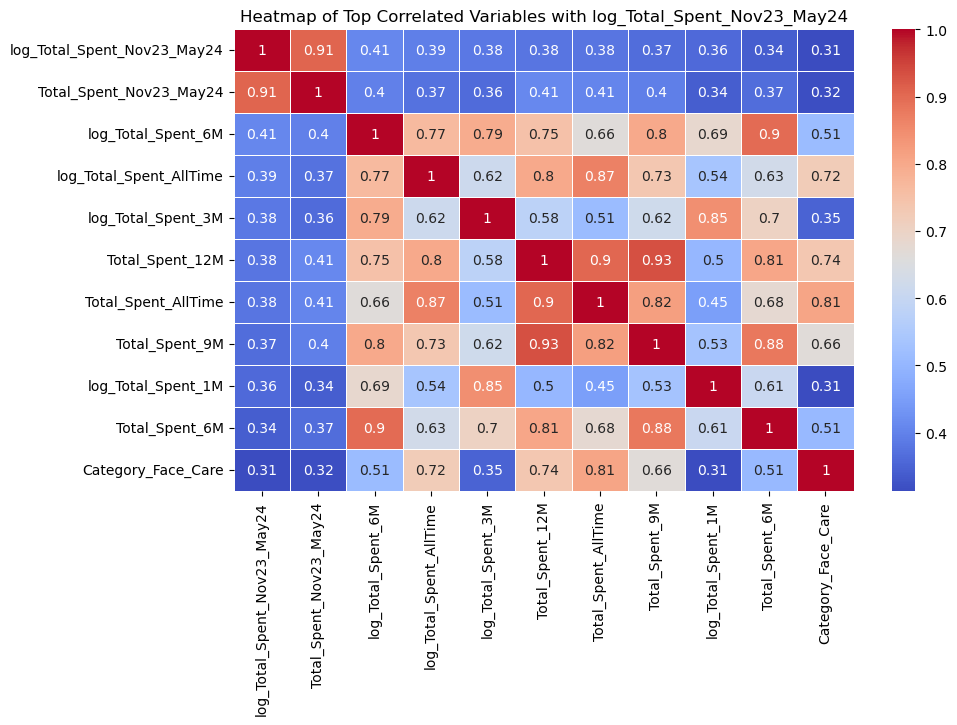

In [33]:
correlation_matrix = data.corr()
# Get correlations of all variables with 'log_Total_Spent_Nov23_May24'
log_spent_correlations = correlation_matrix['log_Total_Spent_Nov23_May24'].abs().sort_values(ascending=False)

# Select the top 10 most correlated variables (excluding the target itself)
top_10_correlated = log_spent_correlations[1:11]

# Create a heatmap for the top 10 correlated variables including 'log_Total_Spent_Nov23_May24'
plt.figure(figsize=(10, 6))
top_10_with_log = data[['log_Total_Spent_Nov23_May24'] + list(top_10_correlated.index)]
sns.heatmap(top_10_with_log.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap of Top Correlated Variables with log_Total_Spent_Nov23_May24")
plt.show()




In [34]:
top_10_correlated

Total_Spent_Nov23_May24    0.907693
log_Total_Spent_6M         0.408543
log_Total_Spent_AllTime    0.394647
log_Total_Spent_3M         0.383489
Total_Spent_12M            0.379020
Total_Spent_AllTime        0.378306
Total_Spent_9M             0.366081
log_Total_Spent_1M         0.360145
Total_Spent_6M             0.339423
Category_Face_Care         0.312527
Name: log_Total_Spent_Nov23_May24, dtype: float64

In [35]:
# Preparing the data for regression analysis
top_10_variables = list(top_10_correlated.index)
X = data[top_10_variables]
y = data['log_Total_Spent_Nov23_May24']

# Adding a constant term for the intercept in the regression model
X = sm.add_constant(X)

# Running the OLS regression
model = sm.OLS(y, X, missing='drop')
results = model.fit()

# Extracting the t-values for each variable
t_values = results.tvalues

# Displaying the top 10 t-values for the most correlated variables
t_values


const                      31.525462
Total_Spent_Nov23_May24    82.850792
log_Total_Spent_6M          3.231119
log_Total_Spent_AllTime     4.615683
log_Total_Spent_3M          1.530454
Total_Spent_12M            -0.558951
Total_Spent_AllTime        -3.013438
Total_Spent_9M              0.775982
log_Total_Spent_1M          0.246212
Total_Spent_6M             -3.910105
Category_Face_Care          1.887285
dtype: float64

### Conclusion:
- Significant variables: Constant, log_Total_Spent_6M, log_Total_Spent_3M, and Brand Description_Toleriane.
- Not significant variables: log_Total_Spent_AllTime, Total_Spent_12M, Total_Spent_9M, log_Total_Spent_1M, Transaction_Count_12M, Transaction_Count_9M, and Transaction_Count_6M.


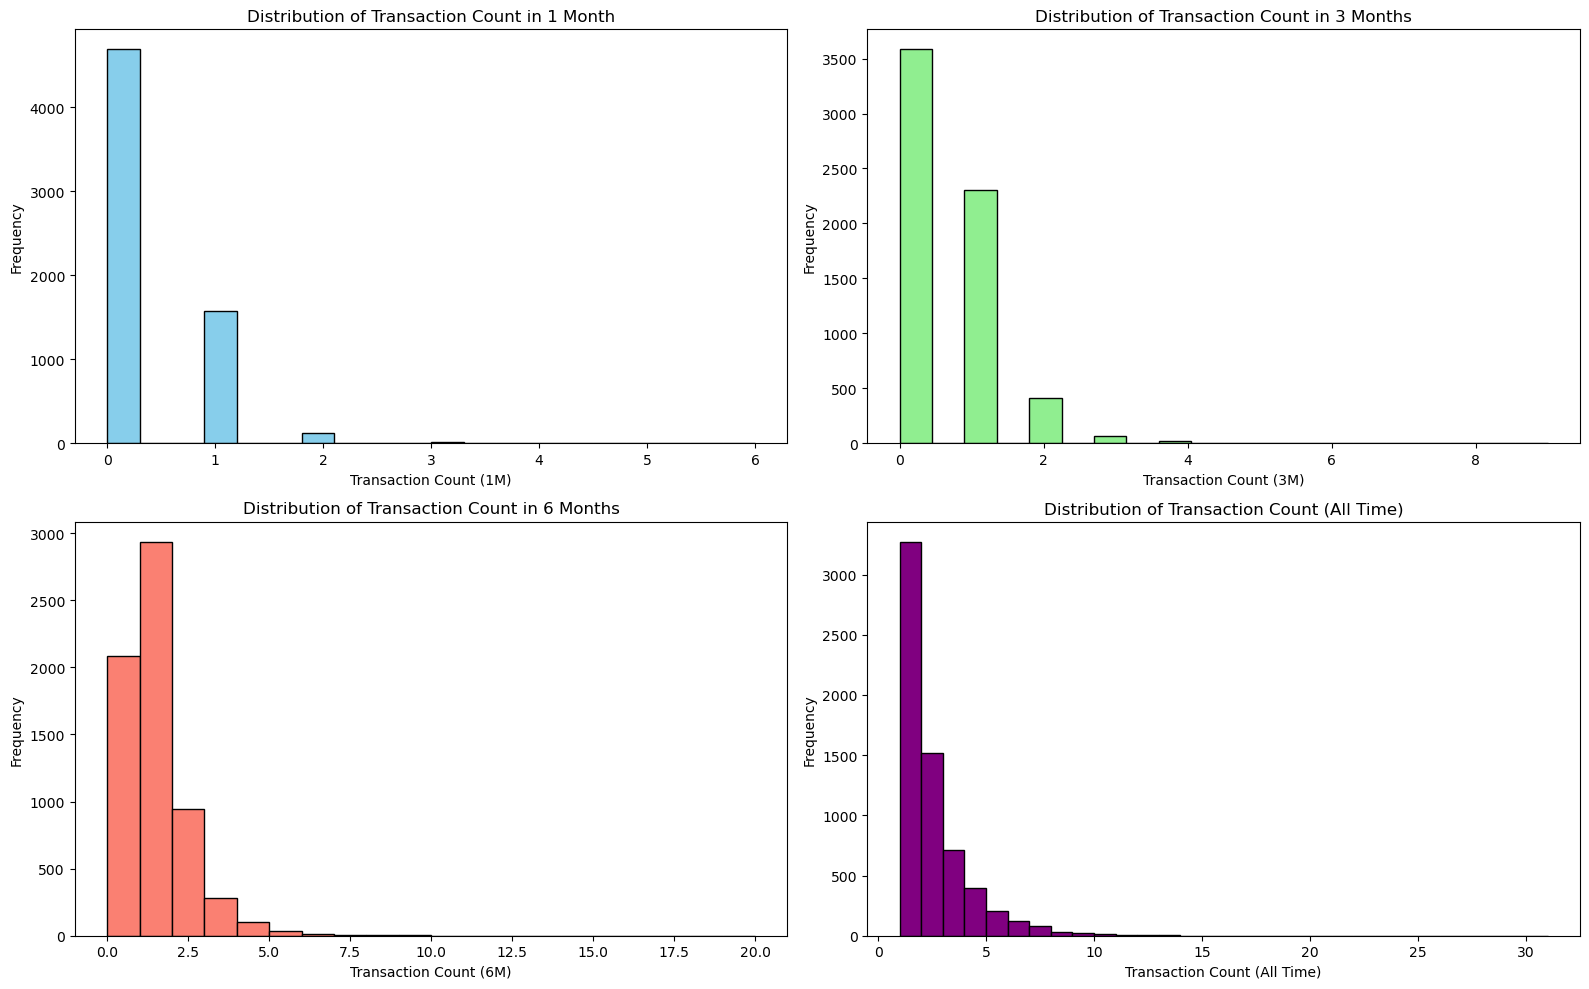

In [36]:
# Plotting distributions of transaction counts across different time periods
plt.figure(figsize=(16, 10))

# 1 Month Transaction Count
plt.subplot(2, 2, 1)
plt.hist(data['Transaction_Count_1M'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Transaction Count in 1 Month')
plt.xlabel('Transaction Count (1M)')
plt.ylabel('Frequency')

# 3 Months Transaction Count
plt.subplot(2, 2, 2)
plt.hist(data['Transaction_Count_3M'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Transaction Count in 3 Months')
plt.xlabel('Transaction Count (3M)')
plt.ylabel('Frequency')

# 6 Months Transaction Count
plt.subplot(2, 2, 3)
plt.hist(data['Transaction_Count_6M'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Transaction Count in 6 Months')
plt.xlabel('Transaction Count (6M)')
plt.ylabel('Frequency')

# All Time Transaction Count
plt.subplot(2, 2, 4)
plt.hist(data['Transaction_Count_AllTime'], bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Transaction Count (All Time)')
plt.xlabel('Transaction Count (All Time)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# Interaction terms

In [37]:
# List of skin concern columns to convert to binary
skin_concern_columns = [
    'Skin Concern_Acne-Prone Skin', 'Skin Concern_Anti-Ageing', 
    'Skin Concern_Irritation-Prone Skin', 'Skin Concern_Pigmentation and Dark Spots',
    'Skin Concern_Sun Protection'
]

# Loop through each skin concern column and create a new binary column
for col in skin_concern_columns:
    data[col + '_Binary'] = data[col].apply(lambda x: 1 if x != 0 else 0)

# Display the new binary columns
data[[col + '_Binary' for col in skin_concern_columns]].head()
data

Unnamed: 0 CustomerID  Has_Transaction_Nov23_May24  \
0              0   LRP00002                            1   
1              1   LRP00004                            1   
2              2   LRP00008                            1   
3              3   LRP00009                            1   
4              4   LRP00012                            1   
...          ...        ...                          ...   
6395        6808   LRP53766                            1   
6396        6809   LRP53769                            1   
6397        6810   LRP53780                            1   
6398        6812   LRP53805                            1   
6399        6813   LRP53811                            1   

      Total_Spent_Nov23_May24  Total_Spent_1M  Transaction_Count_1M  \
0                      119.81          143.00                     1   
1                      461.54            0.00                     0   
2                       38.41            0.00                     0   
3                      168.25           73.62                     1   
4                       82.28            0.00                     0   
...                       ...             ...                   ...   
6395                    55.90            0.00                     0   
6396                   136.80          100.15                     1   
6397                   196.00            0.00                     0   
6398                    58.35           63.40                     1   
6399                   100.90           73.90                     1   

      Total_Spent_3M  Transaction_Count_3M  Total_Spent_6M  \
0             143.00                     1          143.00   
1               0.00                     0          189.36   
2               0.00                     0          161.59   
3              73.62                     1           73.62   
4               0.00                     0            0.00   
...              ...                   ...             ...   
6395          133.85                     1          133.85   
6396          100.15                     1          100.15   
6397          180.67                     1          180.67   
6398           63.40                     1           63.40   
6399           73.90                     1           73.90   

      Transaction_Count_6M  Total_Spent_9M  Transaction_Count_9M  \
0                        1          143.00                     1   
1                        1          189.36                     1   
2                        1          161.59                     1   
3                        1           73.62                     1   
4                        0            0.00                     0   
...                    ...             ...                   ...   
6395                     1          133.85                     1   
6396                     1          100.15                     1   
6397                     1          180.67                     1   
6398                     1           63.40                     1   
6399                     1           73.90                     1   

      Total_Spent_12M  Transaction_Count_12M  Total_Spent_AllTime  \
0              143.00                      1               143.00   
1              189.36                      1               189.36   
2              161.59                      1               161.59   
3               73.62                      1                73.62   
4                0.00                      0                88.85   
...               ...                    ...                  ...   
6395           133.85                      1               133.85   
6396           100.15                      1               100.15   
6397           180.67                      1               180.67   
6398            63.40                      1                63.40   
6399            73.90                      1                73.90   

      Transaction_Count_AllTime  Brand De

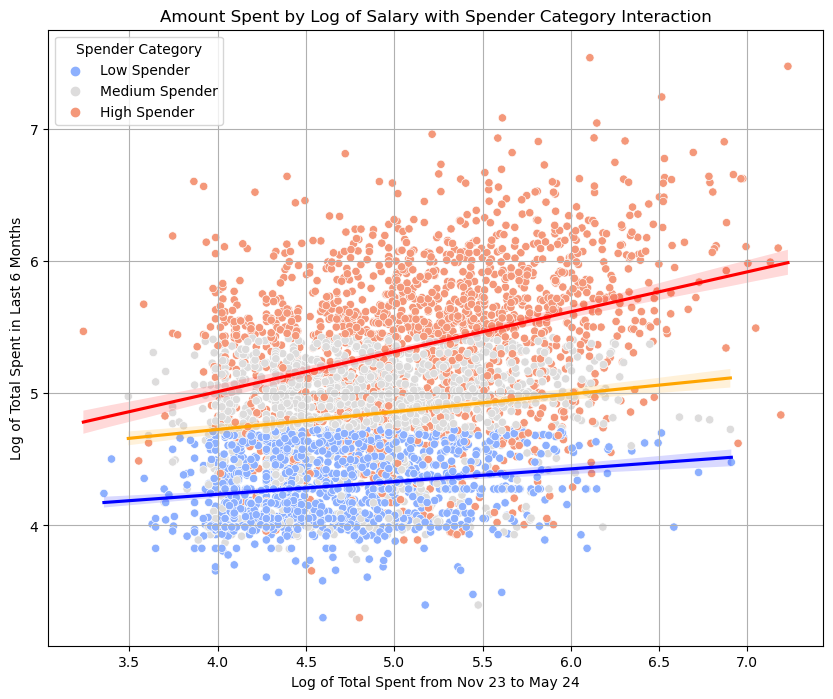

In [38]:
# Define the thresholds for categorizing spenders into low, medium, and high
low_threshold = data['Total_Spent_AllTime'].quantile(0.33)
high_threshold = data['Total_Spent_AllTime'].quantile(0.66)

# Create the 'Spender_Category' column
data['Spender_Category'] = pd.cut(data['Total_Spent_AllTime'], 
                                  bins=[-float('inf'), low_threshold, high_threshold, float('inf')], 
                                  labels=['Low Spender', 'Medium Spender', 'High Spender'])

# Plotting the scatter plot with regression lines for each Spender Category
plt.figure(figsize=(10, 8))

# Using seaborn to plot with different categories
sns.scatterplot(data=data, x='log_Total_Spent_Nov23_May24', y='log_Total_Spent_6M', hue='Spender_Category', palette='coolwarm')

# Adding regression lines
sns.regplot(data=data[data['Spender_Category'] == 'Low Spender'], x='log_Total_Spent_Nov23_May24', y='log_Total_Spent_6M', scatter=False, color='blue')
sns.regplot(data=data[data['Spender_Category'] == 'Medium Spender'], x='log_Total_Spent_Nov23_May24', y='log_Total_Spent_6M', scatter=False, color='orange')
sns.regplot(data=data[data['Spender_Category'] == 'High Spender'], x='log_Total_Spent_Nov23_May24', y='log_Total_Spent_6M', scatter=False, color='red')

plt.title('Amount Spent by Log of Salary with Spender Category Interaction')
plt.xlabel('Log of Total Spent from Nov 23 to May 24')
plt.ylabel('Log of Total Spent in Last 6 Months')
plt.legend(title='Spender Category')
plt.grid(True)

plt.show()

In [39]:
# Selecting only the skin concern columns for idxmax operation
skin_concern_columns = ['Skin Concern_Acne-Prone Skin', 'Skin Concern_Anti-Ageing',
                        'Skin Concern_Irritation-Prone Skin', 'Skin Concern_Pigmentation and Dark Spots',
                        'Skin Concern_Sun Protection']

# Applying idxmax for only these columns
data['Most Important Skin Concern'] = data[skin_concern_columns].idxmax(axis=1)

In [40]:
data

Unnamed: 0 CustomerID  Has_Transaction_Nov23_May24  \
0              0   LRP00002                            1   
1              1   LRP00004                            1   
2              2   LRP00008                            1   
3              3   LRP00009                            1   
4              4   LRP00012                            1   
...          ...        ...                          ...   
6395        6808   LRP53766                            1   
6396        6809   LRP53769                            1   
6397        6810   LRP53780                            1   
6398        6812   LRP53805                            1   
6399        6813   LRP53811                            1   

      Total_Spent_Nov23_May24  Total_Spent_1M  Transaction_Count_1M  \
0                      119.81          143.00                     1   
1                      461.54            0.00                     0   
2                       38.41            0.00                     0   
3                      168.25           73.62                     1   
4                       82.28            0.00                     0   
...                       ...             ...                   ...   
6395                    55.90            0.00                     0   
6396                   136.80          100.15                     1   
6397                   196.00            0.00                     0   
6398                    58.35           63.40                     1   
6399                   100.90           73.90                     1   

      Total_Spent_3M  Transaction_Count_3M  Total_Spent_6M  \
0             143.00                     1          143.00   
1               0.00                     0          189.36   
2               0.00                     0          161.59   
3              73.62                     1           73.62   
4               0.00                     0            0.00   
...              ...                   ...             ...   
6395          133.85                     1          133.85   
6396          100.15                     1          100.15   
6397          180.67                     1          180.67   
6398           63.40                     1           63.40   
6399           73.90                     1           73.90   

      Transaction_Count_6M  Total_Spent_9M  Transaction_Count_9M  \
0                        1          143.00                     1   
1                        1          189.36                     1   
2                        1          161.59                     1   
3                        1           73.62                     1   
4                        0            0.00                     0   
...                    ...             ...                   ...   
6395                     1          133.85                     1   
6396                     1          100.15                     1   
6397                     1          180.67                     1   
6398                     1           63.40                     1   
6399                     1           73.90                     1   

      Total_Spent_12M  Transaction_Count_12M  Total_Spent_AllTime  \
0              143.00                      1               143.00   
1              189.36                      1               189.36   
2              161.59                      1               161.59   
3               73.62                      1                73.62   
4                0.00                      0                88.85   
...               ...                    ...                  ...   
6395           133.85                      1               133.85   
6396           100.15                      1               100.15   
6397           180.67                      1               180.67   
6398            63.40                      1                63.40   
6399            73.90                      1                73.90   

      Transaction_Count_AllTime  Brand De

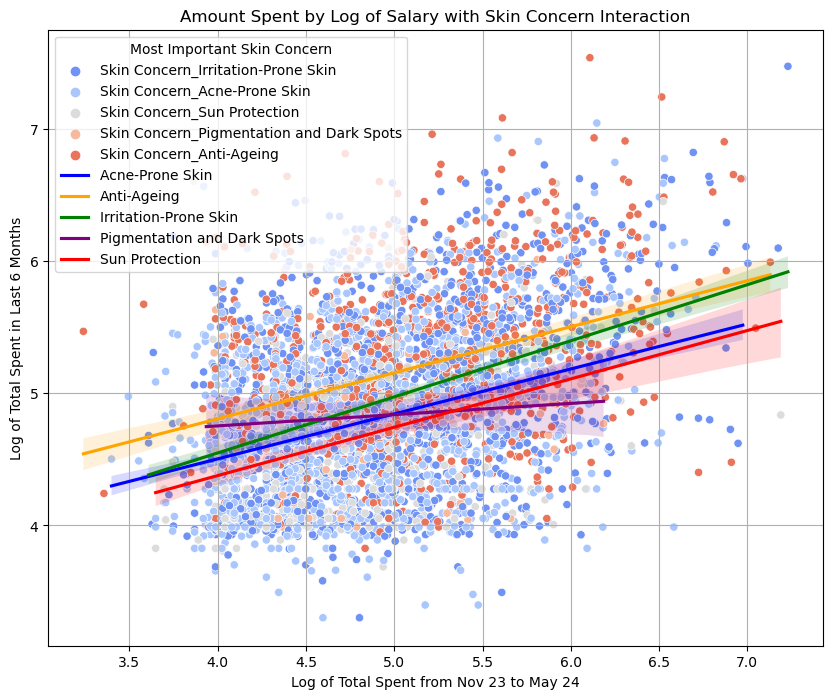

In [41]:
# Applying idxmax for only these columns
data['Most Important Skin Concern'] = data[skin_concern_columns].idxmax(axis=1)

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `data` is your DataFrame, and we're replacing 'Spender_Category' with 'Most Important Skin Concern'
plt.figure(figsize=(10, 8))

# Scatter plot with different skin concerns
sns.scatterplot(data=data, x='log_Total_Spent_Nov23_May24', y='log_Total_Spent_6M', hue='Most Important Skin Concern', palette='coolwarm')

# Adding regression lines for each skin concern interaction
# Adding regression lines for each skin concern interaction
sns.regplot(data=data[data['Most Important Skin Concern'] == 'Skin Concern_Acne-Prone Skin'], 
            x='log_Total_Spent_Nov23_May24', y='log_Total_Spent_6M', scatter=False, color='blue', label='Acne-Prone Skin')
sns.regplot(data=data[data['Most Important Skin Concern'] == 'Skin Concern_Anti-Ageing'], 
            x='log_Total_Spent_Nov23_May24', y='log_Total_Spent_6M', scatter=False, color='orange', label='Anti-Ageing')
sns.regplot(data=data[data['Most Important Skin Concern'] == 'Skin Concern_Irritation-Prone Skin'], 
            x='log_Total_Spent_Nov23_May24', y='log_Total_Spent_6M', scatter=False, color='green', label='Irritation-Prone Skin')
sns.regplot(data=data[data['Most Important Skin Concern'] == 'Skin Concern_Pigmentation and Dark Spots'], 
            x='log_Total_Spent_Nov23_May24', y='log_Total_Spent_6M', scatter=False, color='purple', label='Pigmentation and Dark Spots')
sns.regplot(data=data[data['Most Important Skin Concern'] == 'Skin Concern_Sun Protection'], 
            x='log_Total_Spent_Nov23_May24', y='log_Total_Spent_6M', scatter=False, color='red', label='Sun Protection')

plt.title('Amount Spent by Log of Salary with Skin Concern Interaction')
plt.xlabel('Log of Total Spent from Nov 23 to May 24')
plt.ylabel('Log of Total Spent in Last 6 Months')
plt.legend(title='Most Important Skin Concern')
plt.grid(True)

plt.show()




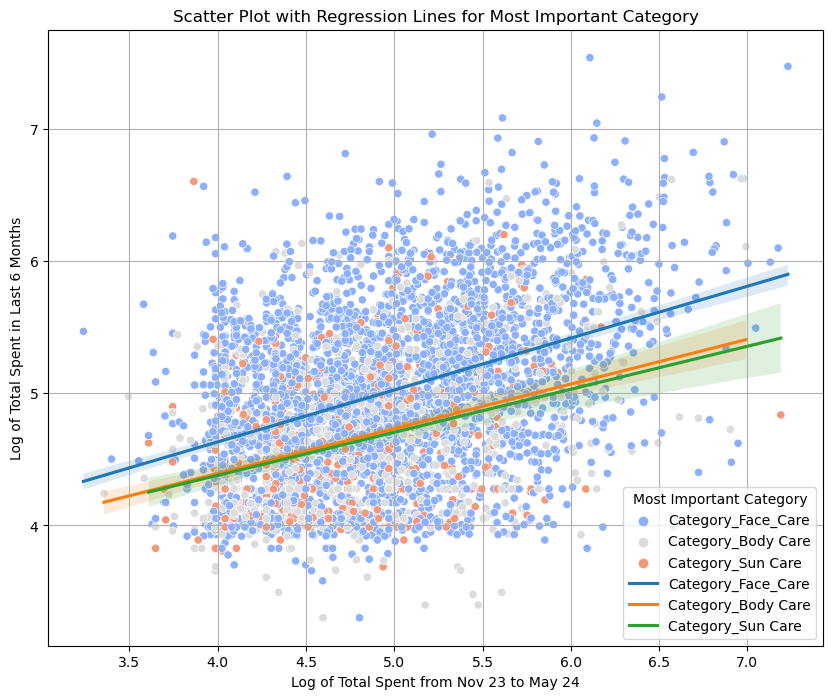

In [42]:
# Create 'Most Important Category' based on the maximum value in category columns
data['Most Important Category'] = data[category_columns].idxmax(axis=1)

# Creating scatter and regplot for Most Important Category
plt.figure(figsize=(10, 8))
sns.scatterplot(data=data, x='log_Total_Spent_Nov23_May24', y='log_Total_Spent_6M', hue='Most Important Category', palette='coolwarm')

# Adding regression lines for each category
for category in data['Most Important Category'].unique():
    sns.regplot(data=data[data['Most Important Category'] == category], 
                x='log_Total_Spent_Nov23_May24', y='log_Total_Spent_6M', scatter=False, label=category)

plt.title('Scatter Plot with Regression Lines for Most Important Category')
plt.xlabel('Log of Total Spent from Nov 23 to May 24')
plt.ylabel('Log of Total Spent in Last 6 Months')
plt.legend(title='Most Important Category')
plt.grid(True)
plt.show()


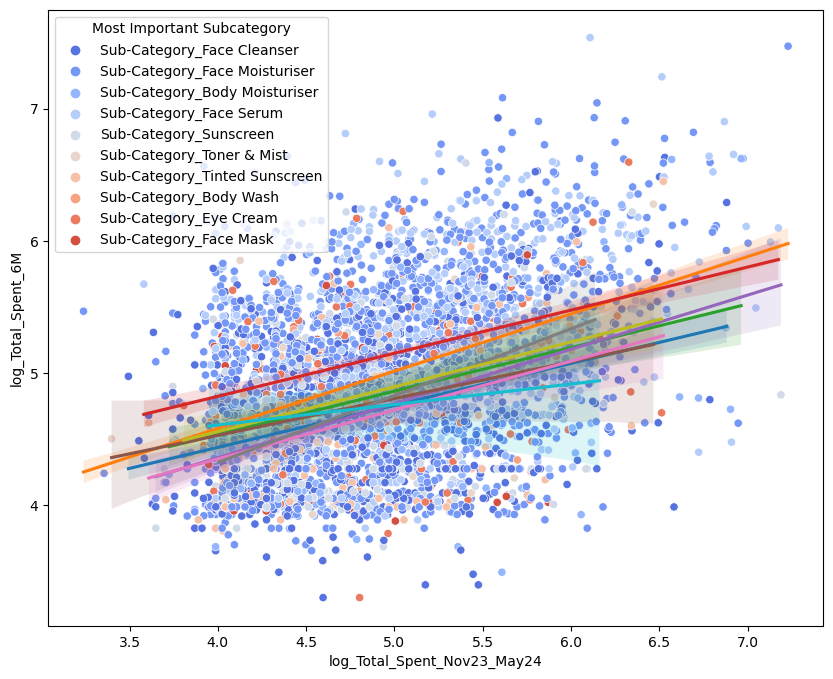

In [43]:
# Define the subcategory columns (adjust column names as necessary)
subcategory_columns = ['Sub-Category_Face Cleanser', 'Sub-Category_Eye Cream', 'Sub-Category_Face Moisturiser', 
                       'Sub-Category_Body Moisturiser', 'Sub-Category_Face Serum', 'Sub-Category_Face Mask',
                       'Sub-Category_Sunscreen', 'Sub-Category_Tinted Sunscreen', 'Sub-Category_Toner & Mist', 
                       'Sub-Category_Body Wash']
# Create 'Most Important Subcategory' based on the maximum value in subcategory columns
data['Most Important Subcategory'] = data[subcategory_columns].idxmax(axis=1)

# Creating scatter and regplot for Most Important Subcategory
plt.figure(figsize=(10, 8))
sns.scatterplot(data=data, x='log_Total_Spent_Nov23_May24', y='log_Total_Spent_6M', hue='Most Important Subcategory', palette='coolwarm')

# Adding regression lines for each subcategory
for subcategory in data['Most Important Subcategory'].unique():
    sns.regplot(data=data[data['Most Important Subcategory'] == subcategory], 
                x='log_Total_Spent_Nov23_May24', y='log_Total_Spent_6M', scatter=False, label=subcategory)

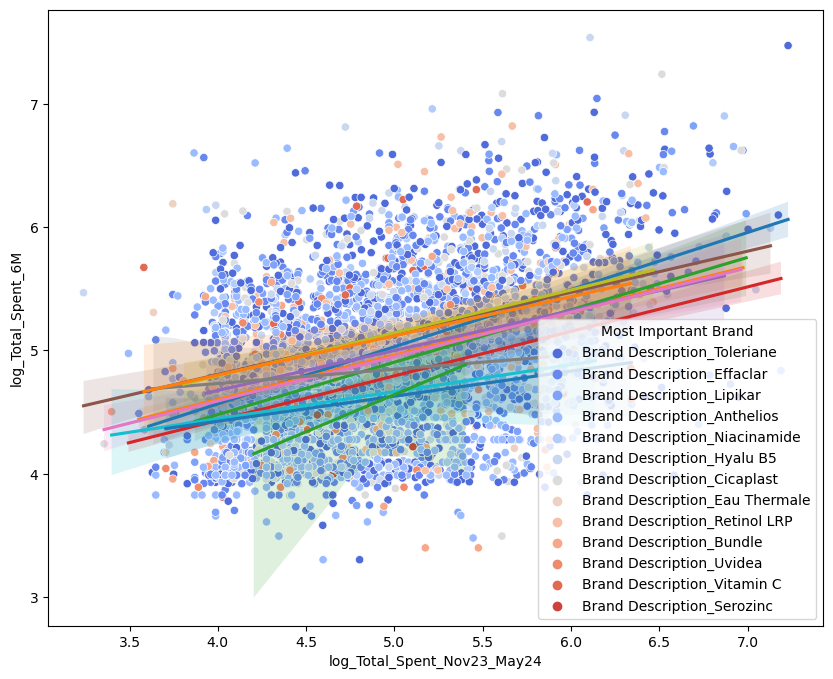

In [44]:

# Create 'Most Important Brand' based on the maximum value in brand columns
data['Most Important Brand'] = data[brand_columns].idxmax(axis=1)

# Creating scatter and regplot for Most Important Brand
plt.figure(figsize=(10, 8))
sns.scatterplot(data=data, x='log_Total_Spent_Nov23_May24', y='log_Total_Spent_6M', hue='Most Important Brand', palette='coolwarm')

# Adding regression lines for each brand
for brand in data['Most Important Brand'].unique():
    sns.regplot(data=data[data['Most Important Brand'] == brand], 
                x='log_Total_Spent_Nov23_May24', y='log_Total_Spent_6M', scatter=False, label=brand)

In [45]:
# Calculate total transaction count over the entire period (12M)
data['Total_Transaction_Count'] = data['Transaction_Count_1M'] + data['Transaction_Count_3M'] + data['Transaction_Count_6M'] + data['Transaction_Count_9M'] + data['Transaction_Count_12M']

# Rank the frequency scores by dividing into quintiles (1-5), with 5 being the most frequent customers
data['Frequency_Score'] = pd.qcut(data['Total_Transaction_Count'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

# Correcting the Recency calculation: More recent transactions should receive a higher score

def calculate_recency_corrected(row):
    if row['Transaction_Count_1M'] > 0:
        return 6  # Most recent (1M)
    elif row['Transaction_Count_3M'] > 0:
        return 5  # Recent (3M)
    elif row['Transaction_Count_6M'] > 0:
        return 4  # Moderately recent (6M)
    elif row['Transaction_Count_9M'] > 0:
        return 3  # Less recent (9M)
    elif row['Transaction_Count_12M'] > 0:
        return 2  # Least recent (12M)
    else:
        return 1  # No transactions in the last 12M

# Apply the corrected recency calculation function
data['Recency_Score_Corrected'] = data.apply(calculate_recency_corrected, axis=1)

# Rank the transaction count for Frequency score
data['Frequency_Score'] = pd.qcut(data['Total_Transaction_Count'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

# Rank the Total_Spent_Nov23_May24 for Monetary score
data['Monetary_Score'] = pd.qcut(data['Total_Spent_AllTime'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

# Combine Recency, Frequency, and Monetary scores to compute the RFM score
w_r = 1 / 3  # Recency weight
w_f = 1 / 3  # Frequency weight
w_m = 1 / 3  # Monetary weight

# Calculate the weighted RFM Score
data['RFM_Score_Sum'] = (data['Recency_Score_Corrected'] +
                         data['Frequency_Score'].astype(float) +
                         data['Monetary_Score'].astype(float))

# Show the first few rows with the combined RFM score
data[['CustomerID', 'Recency_Score_Corrected', 'Frequency_Score', 'Monetary_Score', 'RFM_Score_Sum']].head()
data

Unnamed: 0 CustomerID  Has_Transaction_Nov23_May24  \
0              0   LRP00002                            1   
1              1   LRP00004                            1   
2              2   LRP00008                            1   
3              3   LRP00009                            1   
4              4   LRP00012                            1   
...          ...        ...                          ...   
6395        6808   LRP53766                            1   
6396        6809   LRP53769                            1   
6397        6810   LRP53780                            1   
6398        6812   LRP53805                            1   
6399        6813   LRP53811                            1   

      Total_Spent_Nov23_May24  Total_Spent_1M  Transaction_Count_1M  \
0                      119.81          143.00                     1   
1                      461.54            0.00                     0   
2                       38.41            0.00                     0   
3                      168.25           73.62                     1   
4                       82.28            0.00                     0   
...                       ...             ...                   ...   
6395                    55.90            0.00                     0   
6396                   136.80          100.15                     1   
6397                   196.00            0.00                     0   
6398                    58.35           63.40                     1   
6399                   100.90           73.90                     1   

      Total_Spent_3M  Transaction_Count_3M  Total_Spent_6M  \
0             143.00                     1          143.00   
1               0.00                     0          189.36   
2               0.00                     0          161.59   
3              73.62                     1           73.62   
4               0.00                     0            0.00   
...              ...                   ...             ...   
6395          133.85                     1          133.85   
6396          100.15                     1          100.15   
6397          180.67                     1          180.67   
6398           63.40                     1           63.40   
6399           73.90                     1           73.90   

      Transaction_Count_6M  Total_Spent_9M  Transaction_Count_9M  \
0                        1          143.00                     1   
1                        1          189.36                     1   
2                        1          161.59                     1   
3                        1           73.62                     1   
4                        0            0.00                     0   
...                    ...             ...                   ...   
6395                     1          133.85                     1   
6396                     1          100.15                     1   
6397                     1          180.67                     1   
6398                     1           63.40                     1   
6399                     1           73.90                     1   

      Total_Spent_12M  Transaction_Count_12M  Total_Spent_AllTime  \
0              143.00                      1               143.00   
1              189.36                      1               189.36   
2              161.59                      1               161.59   
3               73.62                      1                73.62   
4                0.00                      0                88.85   
...               ...                    ...                  ...   
6395           133.85                      1               133.85   
6396           100.15                      1               100.15   
6397           180.67                      1               180.67   
6398            63.40                      1                63.40   
6399            73.90                      1                73.90   

      Transaction_Count_AllTime  Brand De

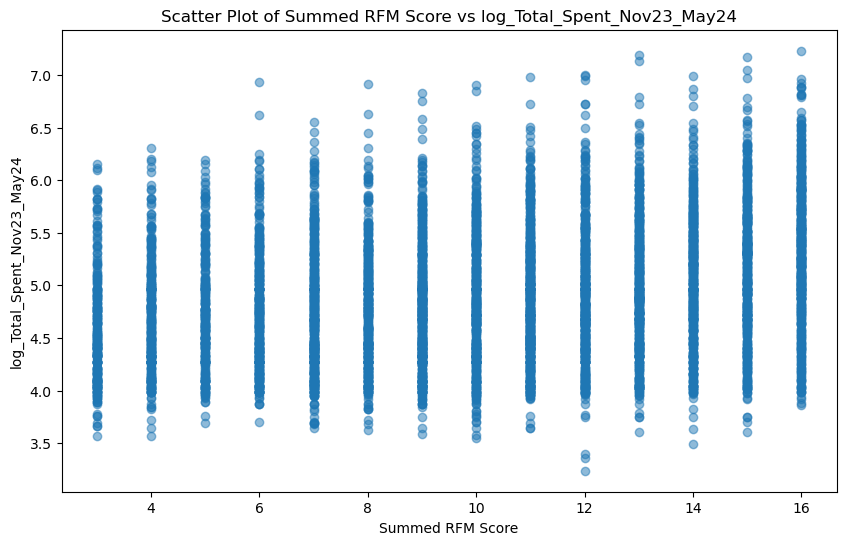

In [46]:

# Create scatter plot between summed RFM Score and log_Total_Spent_Nov23_May24
plt.figure(figsize=(10, 6))
plt.title('Scatter Plot of Summed RFM Score vs log_Total_Spent_Nov23_May24')
plt.scatter(data['RFM_Score_Sum'], data['log_Total_Spent_Nov23_May24'], alpha=0.5)
plt.xlabel('Summed RFM Score')
plt.ylabel('log_Total_Spent_Nov23_May24')
plt.show()


In [47]:
# Calculate the correlation between log_Total_Spent_Nov23_May24 and the new RFM score (summed)
rfm_correlation = data[['RFM_Score_Sum', 'log_Total_Spent_Nov23_May24']].corr()

# Display the correlation matrix
rfm_correlation


RFM_Score_Sum  log_Total_Spent_Nov23_May24
RFM_Score_Sum                     1.000000                     0.277068
log_Total_Spent_Nov23_May24       0.277068                     1.000000

In [48]:
# Perform a linear regression to assess the significance of the relationship
import statsmodels.api as sm

# Preparing the data for regression analysis
X_rfm = sm.add_constant(data['RFM_Score_Sum'])  # Adding a constant term for the intercept
y_log_spent = data['log_Total_Spent_Nov23_May24']

# Running the OLS regression
model_rfm = sm.OLS(y_log_spent, X_rfm, missing='drop')
results_rfm = model_rfm.fit()

# Extracting the summary of the regression, which includes the p-value (significance)
rfm_significance = results_rfm.summary()
print(rfm_significance)


                                 OLS Regression Results                                
Dep. Variable:     log_Total_Spent_Nov23_May24   R-squared:                       0.077
Model:                                     OLS   Adj. R-squared:                  0.077
Method:                          Least Squares   F-statistic:                     532.0
Date:                         Wed, 11 Sep 2024   Prob (F-statistic):          3.86e-113
Time:                                 16:44:00   Log-Likelihood:                -5781.3
No. Observations:                         6400   AIC:                         1.157e+04
Df Residuals:                             6398   BIC:                         1.158e+04
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------